# ESTUDO DE CASO: O Fenômeno Inflacionário no Brasil (Parte 3)

# ESTUDO DE CASO: O Fenômeno Inflacionário no Brasil (Parte 3)

## Sobre a Parte 1 e 2

Faaaaaaaala camaradas!

Nas partes 1 e 2, (aqui localizada) estudamos o fenômeno inflacionário no Brasil de uma maneira didática, para que qualquer pessoa sendo ela leiga ou não, compreenda sobre esse fenômeno que nos afeta diariamente e como foi a sua trajetória até aqui. 

Nesse estudo, o objetivo sempre fopi treinar conhecimentos em:
- Economia
- Programação
- Data Science
- Machine Learning
- Estatística
- Storytelling
- Visualização de dados

E é o que vamos aplicar nessa 3ª e última (grazadels) parte.

## Sobre a Parte 3 (final)

Chegamos até aqui depois de muuuuioto trabalho (totalmente prazeroso).

Nós coletamos os dados por meio de APIs, fizemos tratamento, plotamos, criamos modelos e fizemos um estudo em temáticas como:
- Inflação por faixa de Renda
- Inflação por grupo de alimentos
- Quebras Estruturais
- Inflação Serviços x Desemprego
- Modelo de previsão
-etc.

E os últimos tópicos para essa 3ª parte são:
1. Impactos climáticos sobre a inflação
2. Medidas de ancoragem
3. Juro Real x Juro Neutro
4. Deflação
5. Núcleos de Inflação

E como de costume, sempre explicado de maneira didática com base em dados (obviamente) e em fontes com muito mais credibilidade que esse nobre estudante aspirante a cientista de dados.

Pois bem, sem enrolação....vamos lá!

# 1.0 Impactos Climáticos

O clima como já se sabe (espero que sim), é um fator extremamente relevante sobre os preços de produtos consumidos por todas as famílias brasileiras e em outras localidade do plante terra (há quem diga ser plana). E como as mudanças climáticas podem afetas segmentos da economia e respingar nos indicadores inflacionários:

1. **Agricultura e Produção de Alimentos:**
   - Em condições climáticas favoráveis, com chuvas regulares e temperaturas adequadas, a produção agrícola tende a ser positiva.
   - Boas safras resultam em aumento na oferta de alimentos, contribuindo para a redução de preços.
   - Por outro lado, eventos climáticos desfavoráveis, como secas ou tempestades, podem prejudicar as colheitas, diminuindo a oferta e elevando os preços dos alimentos.

2. **Energia:**
   - Mudanças climáticas afetam a geração de energia. Por exemplo, períodos de seca podem reduzir a produção de energia hidrelétrica, resultando em custos mais elevados.
   - Eventos climáticos extremos, como furacões ou tempestades, podem danificar infraestruturas de energia, causando interrupções no fornecimento e aumento nos preços.

3. **Logística e Transporte:**
   - Condições climáticas adversas, como tempestades de neve ou enchentes, podem impactar o transporte de mercadorias.
   - Isso pode acarretar atrasos na entrega de produtos, gerando aumento nos custos logísticos e, eventualmente, nos preços ao consumidor.

4. **Seguros e Riscos Financeiros:**
   - Eventos climáticos extremos podem causar danos significativos a propriedades e culturas, resultando em perdas financeiras.
   - Empresas e agricultores podem enfrentar elevação nos custos de seguros, podendo repassar esses custos adicionais aos consumidores.

5. **Demandas de Consumo:**
   - Mudanças climáticas podem influenciar o comportamento do consumidor. Por exemplo, temperaturas mais altas podem aumentar a demanda por produtos sazonais, impactando seus preços.

Em resumo, as condições climáticas exercem influência em diversos setores da economia, desde a produção de alimentos até a geração de energia e a logística. Essas influências, por sua vez, podem provocar impactos diretos nos custos de produção e na oferta de bens e serviços, afetando os níveis gerais de preços e, consequentemente, a inflação.

EL NIÑO:

Nos últimos anos, observou-se um aumento na temperatura das águas do Oceano Pacífico equatorial, alcançando um ponto de anomalia em agosto (NOAA). Esse fenômeno, conhecido como "El Niño" (quente para uma carambola), possui impactos abrangentes em várias regiões do mundo, podendo influenciar a precipitação e a temperatura, fatores cruciais para o plantio e a colheita de diversas culturas.

Para avaliar os efeitos do El Niño nos preços dos alimentos no Brasil, procedemos à estimativa de um modelo de vetores autoregressivos de ordem p, ou simplesmente VAR(p), com base na referência do BCB (2019).

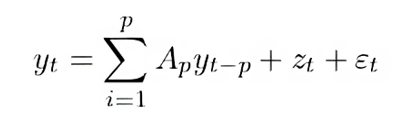

onde:

- y_t = (\pi^{AD}, h_t, \pi_t^*, ONI_t^*)

- \pi^{AD} refere-se à taxa de inflação medida pelo IPCA, subgrupo alimentação no domicílio

- h_t = o hiato do produto medido pela função de produção

- \pi_t^* = a inflação externa, medida pelo Índice de Commodities

- ONI_t^* =  o Oceanic Niño Index (ONI), transformado como (ONI_t + 0,5)^2

- z_t = constantes e dummies sazonais

Vamos ao código:

Caso não tenha os pacotes instalados, aqui estão os códigos de instalação para Jupyter Notebook:

In [55]:
# Pacotes

# !pip install sidrapy
# !pip install python-bcb
# !pip install linearmodels
# !pip install openpyxl
# !pip install ipeadatapy

In [56]:
# Bibliotecas
from bcb import sgs
import pandas as pd
import numpy as np
import sidrapy as sidra
import ipeadatapy as ipea
from functools import reduce
from linearmodels.iv import IV2SLS
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

### 1.0 IPCA

Como de costume, aqui obtemos os dados referentes ao IPCA através do velho SIDRA


In [57]:
# Obtendo os dados referentes ao IPCA através do velho SIDRA
ipca_raw = list(
    map(
        lambda tabela, variavel : (
            sidra.get_table(
                table_code = tabela,
                territorial_level= '1',
                ibge_territorial_code= 'all',
                variable = variavel,
                classifications = {
                    '315': '7171'
                    },
                period = 'all',
                header = 'n'
                )
            ),
        ['655', '2938', '1419', '7060'],
        ['all', '63', '63', '63']
    )
)
ipca_raw

[   NC      NN MC MN      V D1C     D1N     D2C             D2N D3C  \
 0   1  Brasil  2  %   0.17   1  Brasil  199908     agosto 1999  63   
 1   1  Brasil  2  %   0.42   1  Brasil  199909   setembro 1999  63   
 2   1  Brasil  2  %   2.30   1  Brasil  199910    outubro 1999  63   
 3   1  Brasil  2  %   1.66   1  Brasil  199911   novembro 1999  63   
 4   1  Brasil  2  %   1.55   1  Brasil  199912   dezembro 1999  63   
 .. ..     ... .. ..    ...  ..     ...     ...             ...  ..   
 78  1  Brasil  2  %  -0.52   1  Brasil  200602  fevereiro 2006  63   
 79  1  Brasil  2  %  -0.38   1  Brasil  200603      março 2006  63   
 80  1  Brasil  2  %  -0.51   1  Brasil  200604      abril 2006  63   
 81  1  Brasil  2  %  -0.22   1  Brasil  200605       maio 2006  63   
 82  1  Brasil  2  %  -0.92   1  Brasil  200606      junho 2006  63   
 
                        D3N   D4C                          D4N  
 0   IPCA - Variação mensal  7171  11.Alimentação no domicílio  
 1   IPCA - Vari

Organizando os dados obtidos, selecionando as colunas que realmente importam

In [58]:
ipca = (
    pd.concat(
        # Concatenamos e atribuímos nomes aos níveis do índice
        objs=ipca_raw,
        names=['tabela', 'linha']
    )
    .reset_index()
    # Filtramos somente pelas colunas de data e valor do IPCA  
    .filter(items=['D2C', 'V'], axis='columns')
    # Aqui convertemos a data em datetime e IPCA em ponto flutuante (float)
    .assign(
        data=lambda x: pd.to_datetime(x['D2C'], format='%Y%m'),
        valor=lambda x: x['V'].astype(float)
    )
    .filter(items=['data', 'valor'], axis='columns')
    .rename(columns={'data': 'date', 'valor': 'ipca'})
)
ipca

,date,ipca
0,1999-08-01,0.17
1,1999-09-01,0.42
2,1999-10-01,2.30
3,1999-11-01,1.66
4,1999-12-01,1.55
...,...,...
288,2023-08-01,-1.26
289,2023-09-01,-1.02
290,2023-10-01,0.27
291,2023-11-01,0.75


### 1.2 Índice de Commodities x Taxa de Câmbio

**Interligação entre ambas**: <br>

A relação entre esse índice e a Média da Taxa de Câmbio de Compra Livre revela como as oscilações nos preços das commodities agropecuárias estão conectadas às variações na taxa de câmbio na qual o dólar americano pode ser adquirido de forma livre. Isso é significativo porque influencia a competitividade das exportações agrícolas brasileiras, já que as flutuações na taxa de câmbio afetam os custos e lucros dos produtores e exportadores.


Aqui, reunimos dados de: 

- **Índice de Commodities da Agropecuária do Brasil (em dólares americanos)** <br>

Atua como um indicador que mensura as alterações nos preços de alimentos e produtos relacionados à agricultura. Ele reflete se esses preços estão ascendendo ou declinando ao longo do tempo. Esse indicador é valioso para compreender como fatores como o clima, oferta e demanda impactam o custo dos alimentos que consumimos. Se o índice aumenta, pode indicar que os alimentos estão mais caros, enquanto uma diminuição sugere que os alimentos estão mais acessíveis.

- **Média da Taxa de Câmbio Livre (Compra) de Dólar Americano, em uma base mensal** <br>

Indica a quantidade da moeda local necessária para adquirir um dólar americano. Se a taxa estiver elevada, a moeda local é menos robusta em comparação com o dólar, encarecendo os produtos importados. Se estiver baixa, a moeda local é mais robusta, o que pode resultar em produtos importados mais acessíveis. Essa taxa é influenciada por fatores como taxas de juros, inflação e condições econômicas globais, desempenhando um papel crucial no comércio internacional e nas transações financeiras entre países.

In [59]:
ind_dolar_comm = (
    sgs.get({
        'tc_dolar': 3697, 
        'agro_commod': 29041}, 
        start = '1998-01-01')
    .agg({
        'tc_dolar': lambda x: np.mean(x),
        'agro_commod': lambda x: np.mean(x)
    })
    .reset_index()
    .dropna()
    .rename(columns= {'Date': 'date'})
)
ind_dolar_comm

,date,tc_dolar,agro_commod
0,1998-01-01,1.1191,95.69
1,1998-02-01,1.1263,94.60
2,1998-03-01,1.1329,91.60
3,1998-04-01,1.1404,89.94
4,1998-05-01,1.1473,90.24
...,...,...,...
307,2023-08-01,4.9029,183.24
308,2023-09-01,4.9364,187.55
309,2023-10-01,5.0642,184.46
310,2023-11-01,4.8977,182.20


### 1.3 Hiato do Produto

O hiato do produto atua como um indicador essencial na economia, avaliando se ela está operando em um nível "aquecido" ou "resfriado". O PIB potencial representa o desempenho máximo sem causar inflação. Quando o PIB real ultrapassa esse limite, indica uma economia em ritmo acelerado, podendo resultar em inflação. Se fica aquém do potencial, sinaliza uma economia operando abaixo da capacidade total.

Ou seja, ele é vital para os economistas verificarem se a economia está equilibrada, evitando excesso (como desemprego) ou pressão (como inflação) e governos usam essas informações para tomar decisões e manter o equilíbrio econômico.

In [60]:
# Obtendo o Hiato do Produto pelo site do Senado Federal
hiato_produto = (
    pd.read_excel('https://www12.senado.leg.br/ifi/dados/arquivos/estimativas-do-hiato-do-produto-ifi/@@download/file/estimativas-do-hiato-do-produto-ifi.xlsx',
    skiprows=1)
    # Aqui convertemos a coluna 'Trim-Ano' em um índice de período (trimestre) usando pd.PeriodIndex
    .assign(date=lambda x: pd.to_datetime(x['Trim-Ano'], format='%Y%m'),
            # Convertemos a coluna 'Hiato' para float e arredondamos para duas casas decimais
            hiato=lambda x: x['Hiato'].astype(float).round(2))
    .loc[:, ['date', 'hiato']]
)
hiato_produto

,date,hiato
0,1996-03-01,-0.01
1,1996-06-01,-0.01
2,1996-09-01,0.01
3,1996-12-01,0.00
4,1997-03-01,0.00
...,...,...
106,2022-09-01,0.00
107,2022-12-01,-0.00
108,2023-03-01,0.00
109,2023-06-01,0.01


### 1.4 Ocean Nino Index (ONI)

Agora, você vai compreender como esse fenômeno impacta os alimentos em milhões de pratos no Brasil.

O Ocean Niño Index (ONI) avalia as mudanças nas temperaturas da superfície do mar no Oceano Pacífico equatorial central, sendo uma medida crucial para monitorar El Niño e La Niña.

- ONI positivo indica El Niño, com temperaturas do mar acima do normal.
- ONI negativo sugere La Niña, com temperaturas do mar mais frias.

**Resumo:** <br>
Essas variações influenciam o clima global, afetando chuvas, temperaturas e eventos climáticos extremos em várias partes do mundo, sendo uma ferramenta valiosa para prever e compreender os impactos desses fenômenos climáticos.

In [61]:
# Oceanic Nino Index (do site Climate Prediction Center)
oni = pd.read_csv('https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt', sep = '\s+')
# Aqui garantimos que todas as entradas sejam tratadas como valores numéricos 
# O atributo errors='coerce' faz com que quaisquer valores que não possam ser convertidos para numéricos sejam substituídos por NaN
oni = oni.apply(pd.to_numeric, errors = 'coerce')
oni.dropna(inplace = True)
oni

,YR,MON,TOTAL,ClimAdjust,ANOM
0,1950,1,24.56,26.18,-1.62
1,1950,2,25.07,26.39,-1.32
2,1950,3,25.88,26.95,-1.07
3,1950,4,26.29,27.39,-1.11
4,1950,5,26.19,27.56,-1.37
...,...,...,...,...,...
883,2023,8,28.20,26.86,1.35
884,2023,9,28.32,26.72,1.60
885,2023,10,28.44,26.72,1.72
886,2023,11,28.72,26.70,2.02


In [62]:
def process_oni_data(df):
    # Criando a nova coluna DATE
    df['DATE'] = pd.to_datetime(df['YR'].astype(str) + '-' + df['MON'].astype(str).str.zfill(2) + '-01')
    
    # Excluindo as colunas YR e MON
    df = df.drop(['YR', 'MON'], axis=1)
    
    # Organizando as colunas
    df = df[['DATE', 'ANOM']]
    
    # Renomeando as colunas
    df = df.rename(columns={'DATE': 'date', 'ANOM': 'nino'})
    
    return df

oni = process_oni_data(oni)
oni

,date,nino
0,1950-01-01,-1.62
1,1950-02-01,-1.32
2,1950-03-01,-1.07
3,1950-04-01,-1.11
4,1950-05-01,-1.37
...,...,...
883,2023-08-01,1.35
884,2023-09-01,1.60
885,2023-10-01,1.72
886,2023-11-01,2.02


Aqui temos que fazer um tratamento dos dados obtidos para que possamos utilizá-los no modelo que são:
1. Renomear as colunas 'YR' e 'MON' para 'Year' e 'Month', respectivamente
2. Calcular a média móvel de 3 meses (rolling mean) da anomalia (ANOM), criando uma nova coluna chamada 'oni'
3. Criar colunas 'Quarter' e 'date_quarter' com base nas colunas 'Year' e 'Month'
4. Agrupar os dados por trimestre (date_quarter) e calcular a média da coluna 'oni' para cada trimestre
5. Criar uma nova coluna chamada 'nino' ao DataFrame e nessa coluna inserir o valor 1 se o valor da coluna 'oni' for maior que 0.5 e 0 caso contrário


### 1.5 Unindo os Dataframes

A união faz a força!

In [63]:
# Criamos um dataframe (df_juncao) com todos os outros criados anteriormente
df_juncao = [ipca, ind_dolar_comm, hiato_produto, oni]
df_juncao

[          date  ipca
 0   1999-08-01  0.17
 1   1999-09-01  0.42
 2   1999-10-01  2.30
 3   1999-11-01  1.66
 4   1999-12-01  1.55
 ..         ...   ...
 288 2023-08-01 -1.26
 289 2023-09-01 -1.02
 290 2023-10-01  0.27
 291 2023-11-01  0.75
 292 2023-12-01  1.34
 
 [293 rows x 2 columns],
           date  tc_dolar  agro_commod
 0   1998-01-01    1.1191        95.69
 1   1998-02-01    1.1263        94.60
 2   1998-03-01    1.1329        91.60
 3   1998-04-01    1.1404        89.94
 4   1998-05-01    1.1473        90.24
 ..         ...       ...          ...
 307 2023-08-01    4.9029       183.24
 308 2023-09-01    4.9364       187.55
 309 2023-10-01    5.0642       184.46
 310 2023-11-01    4.8977       182.20
 311 2023-12-01    4.8966       175.55
 
 [312 rows x 3 columns],
           date  hiato
 0   1996-03-01  -0.01
 1   1996-06-01  -0.01
 2   1996-09-01   0.01
 3   1996-12-01   0.00
 4   1997-03-01   0.00
 ..         ...    ...
 106 2022-09-01   0.00
 107 2022-12-01  -0.00
 108 20

In [64]:
# Usamos as funções 'reduce' e 'merge' para combinar os DataFrames com base na coluna 'date_quarter', usando uma junção à esquerda (how='left')
# Em seguida, removemos as linhas com valores ausentes
df_consolidado = reduce(lambda left, right: pd.merge(left, right, on = 'date', how = 'left'), df_juncao).dropna()
df_consolidado

,date,ipca,tc_dolar,agro_commod,hiato,nino
1,1999-09-01,0.42,1.8973,70.13,-0.02,-1.09
4,1999-12-01,1.55,1.8420,72.05,-0.02,-1.70
7,2000-03-01,-0.63,1.7412,72.33,-0.02,-0.93
10,2000-06-01,0.07,1.8075,75.63,-0.01,-0.64
13,2000-09-01,0.61,1.8384,75.45,-0.00,-0.52
...,...,...,...,...,...,...
277,2022-09-01,-0.86,5.2364,176.44,0.00,-1.07
280,2022-12-01,0.71,5.2418,172.36,-0.00,-0.86
283,2023-03-01,-0.14,5.2109,172.73,0.00,-0.11
286,2023-06-01,-1.07,4.8510,178.18,0.01,0.84


In [65]:
# Criamos duas colunas ao DataFrame resultante, que representam o deslocamento de uma unidade temporal para trás das colunas 'tc_dolar' e 'agro_commod'
df_consolidado['tc_dolar_desloc'] = df_consolidado['tc_dolar'].shift(1)
df_consolidado['agro_commod_desloc'] = df_consolidado['agro_commod'].shift(1)
df_consolidado

,date,ipca,tc_dolar,agro_commod,hiato,nino,tc_dolar_desloc,agro_commod_desloc
1,1999-09-01,0.42,1.8973,70.13,-0.02,-1.09,NaN,NaN
4,1999-12-01,1.55,1.8420,72.05,-0.02,-1.70,1.8973,70.13
7,2000-03-01,-0.63,1.7412,72.33,-0.02,-0.93,1.8420,72.05
10,2000-06-01,0.07,1.8075,75.63,-0.01,-0.64,1.7412,72.33
13,2000-09-01,0.61,1.8384,75.45,-0.00,-0.52,1.8075,75.63
...,...,...,...,...,...,...,...,...
277,2022-09-01,-0.86,5.2364,176.44,0.00,-1.07,5.0486,183.64
280,2022-12-01,0.71,5.2418,172.36,-0.00,-0.86,5.2364,176.44
283,2023-03-01,-0.14,5.2109,172.73,0.00,-0.11,5.2418,172.36
286,2023-06-01,-1.07,4.8510,178.18,0.01,0.84,5.2109,172.73


> Observações:

Você notou que foram criadas novas colunas, não vistas anteriormente:
- **tc_dolar:** <br>
Contém a diferença percentual (ou variação) do índice relacionado ao dólar. Essa coluna provavelmente indica como o valor do dólar em relação à moeda local está mudando ao longo do tempo. Se estiver positiva, sugere uma valorização do dólar em relação à moeda local; se estiver negativa, sugere uma desvalorização.

- **agro_commod:** <br>
Parece ser a diferença percentual (ou variação) de um índice relacionado ao setor agropecuário. Essa coluna provavelmente reflete as mudanças no desempenho ou condições do setor agropecuário ao longo do tempo. Se estiver positiva, sugere um aumento, e se estiver negativa, sugere uma diminuição nas condições ou desempenho do setor.

- **'tc_dolar_desloc':** <br>
Contém os valores da coluna tc_dolar deslocados para cima por um período. Em outras palavras, cada valor em tc_dolar é o valor correspondente na coluna tc_dolar do período anterior.

- **'agro_commod_desloc':**<br>
Contém os valores da coluna agro_commod deslocados para cima por um período. Cada valor em agro_commod é o valor correspondente na coluna agro_commod do período anterior.

### 1.6 Plot

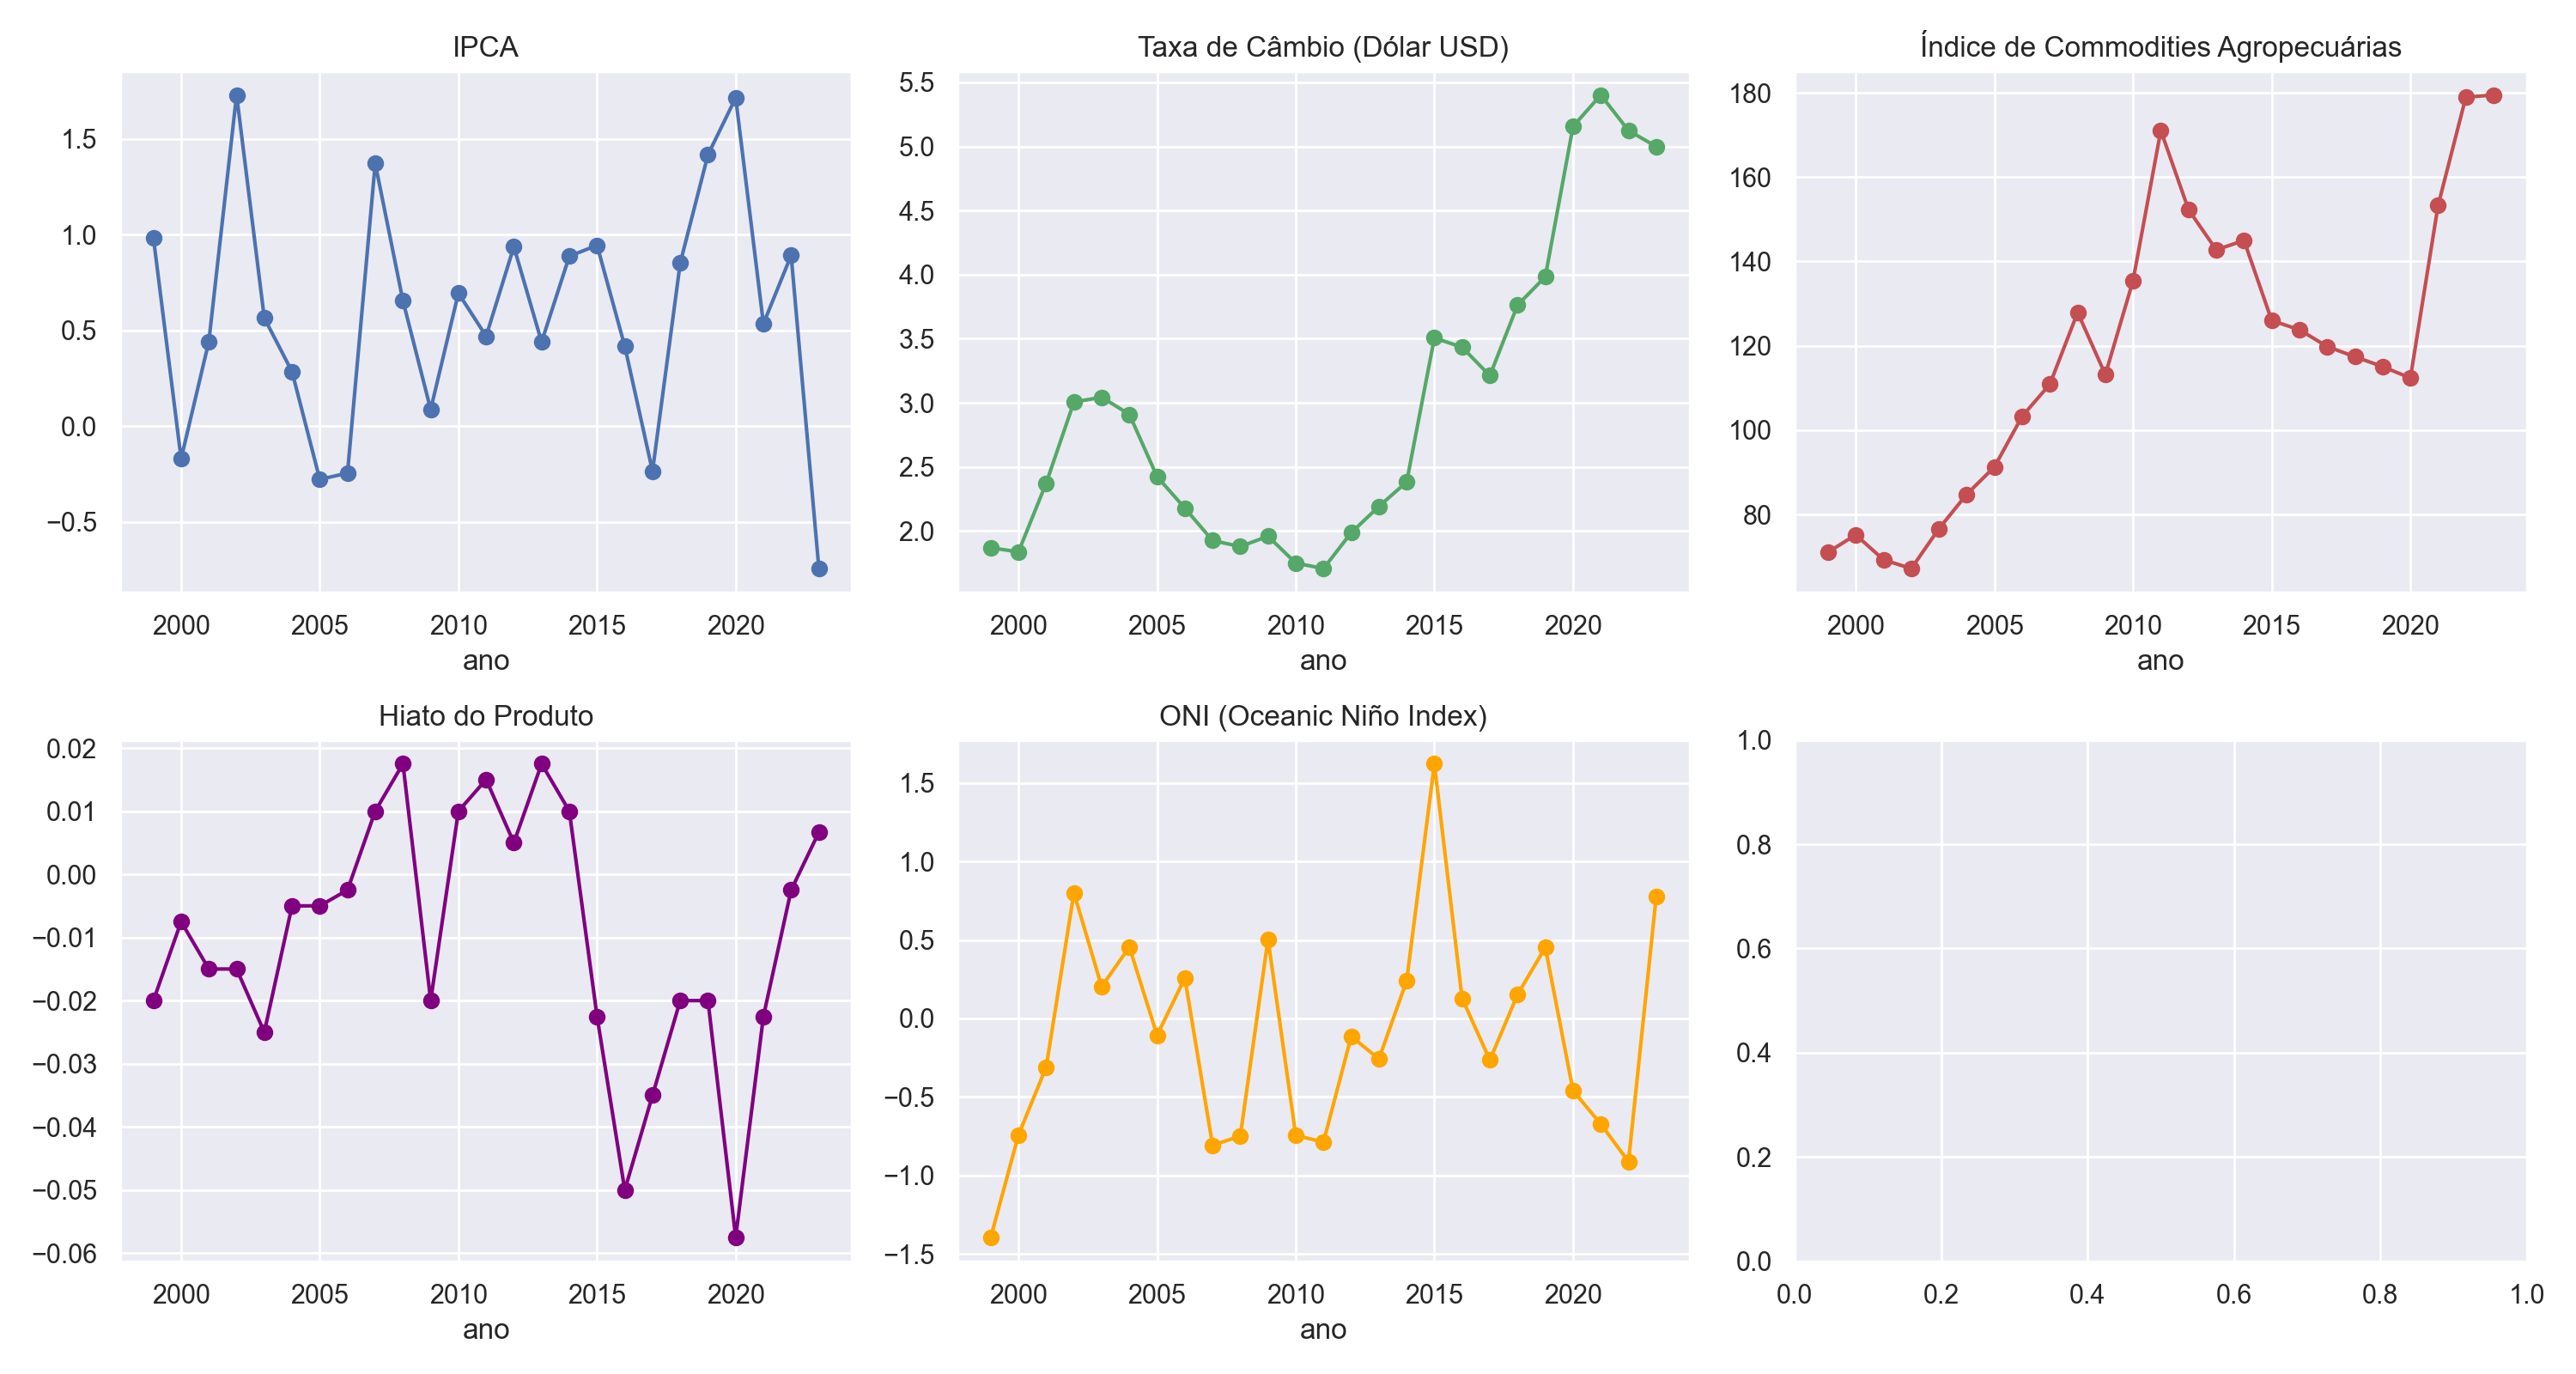

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando uma nova coluna 'ano' a partir da coluna 'date'
df_consolidado['ano'] = df_consolidado['date'].dt.year

# Organizando os dados por ano
df_consolidado_por_ano = df_consolidado.groupby('ano').mean(numeric_only=True)

# Configurando o estilo dos plots usando seaborn
sns.set_theme(style='darkgrid')

# Criando subplots com gráficos de linha
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Plotando o IPCA
df_consolidado_por_ano['ipca'].plot(ax=axes[0, 0], marker='o', linestyle='-', color='b')
axes[0, 0].set_title('IPCA')

# Plotando a Taxa de Câmbio (Dólar USD)
df_consolidado_por_ano['tc_dolar'].plot(ax=axes[0, 1], marker='o', linestyle='-', color='g')
axes[0, 1].set_title('Taxa de Câmbio (Dólar USD)')

# Plotando o Índice de Commodities Agropecuárias
df_consolidado_por_ano['agro_commod'].plot(ax=axes[0, 2], marker='o', linestyle='-', color='r')
axes[0, 2].set_title('Índice de Commodities Agropecuárias')

# Plotando o Hiato do Produto
df_consolidado_por_ano['hiato'].plot(ax=axes[1, 0], marker='o', linestyle='-', color='purple')
axes[1, 0].set_title('Hiato do Produto')

# Adicionando o gráfico do ONI (Oceanic Niño Index)
df_consolidado_por_ano['nino'].plot(ax=axes[1, 1], marker='o', linestyle='-', color='orange')
axes[1, 1].set_title('ONI (Oceanic Niño Index)')

# Ajustando o layout
plt.tight_layout()

# Exibindo os plots
plt.show()


### 1.8 Conclusão

Esses resultados indicam uma interconexão complexa entre fatores econômicos e climáticos, ressaltando a importância de considerar ambos os aspectos ao formular políticas e estratégias. Correlações específicas e padrões temporais podem ser explorados mais a fundo para compreender melhor as dinâmicas subjacentes e antecipar possíveis impactos.

# 2.0 Medidas de Ancoragem

A temática "expectativas ancoradas" no contexto econômico, significa que as projeções para a inflação permanecem próximas à meta, mesmo diante de eventos inesperados. Essa ancoragem facilita a ação do Banco Central ao lidar com pressões inflacionárias, tornando as intervenções menos custosas (pelo menos é o que se espera de BACEN independente).

Aqui faremos uma verificação da ancoragem de expectativas para diferentes horizontes, usando o Boletim Focus para extrair previsões de diversos indicadores, incluindo o IPCA, a principal medida de inflação no Brasil.

Expectativas ancoradas implicam que os valores projetados estejam próximos da meta de inflação ou permaneçam relativamente constantes ao longo do tempo, especialmente para o ano corrente, que influencia os horizontes futuros. No entanto, mudanças brutas (noffa) nas expectativas de IPCA indicam surpresas inflacionárias, resultando na perda da ancoragem.

Para medir a sensibilidade a surpresas inflacionárias, é necessário avaliar como variações nas expectativas para o ano atual impactam as projeções de prazos mais longos. Em um cenário de expectativas bem ancoradas, espera-se uma baixa relação entre as projeções de inflação de curto prazo e as de longo prazo, pois as primeiras refletiriam surpresas inflacionárias.

É aí que a abençoada Econometria entra, nos permitindo calcular essa sensibilidade com a ajuda do coeficiente \beta, de acordo com a equação abaixo:

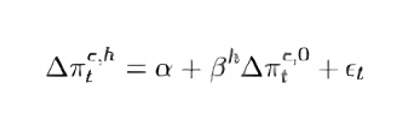

onde h = 1, ... , 4 é referente ao horizonte (anos) que constitui cada expectativa. 
Isso indica que, quanto maior o coeficiente \beta menos ancoradas as expectativas e maior a resposta das expectativas de longo prazo a surpresas inflacionárias. O objetivo principal é evolução deste coeficiente ao longo do tempo, para obtermos as estimativas a partir de janelas móveis de 60 meses.

In [67]:
from bcb import Expectativas
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingStore

### 2.1 Coletando os dados

In [68]:
# Inicialização do objeto Expectativas
em = Expectativas()

# Obtenção do endpoint para Expectativas Mercado Anuais
exp_ipca_endpoint = em.get_endpoint('ExpectativasMercadoAnuais')

# Coleta da expectativa média do IPCA - taxa anual (Expectativas)
exp_ipca_raw = (
    exp_ipca_endpoint.query()
    # Aplicação de filtros
    .filter(
        exp_ipca_endpoint.baseCalculo == 0,
        exp_ipca_endpoint.Indicador == 'IPCA',
        exp_ipca_endpoint.Data >= '2002-01-01'
    )
    # Execução da consulta e obtenção dos dados
    .collect()
)
exp_ipca_raw

,Indicador,IndicadorDetalhe,Data,DataReferencia,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo
0,IPCA,None,2002-01-02,2001,7.3700,7.4100,0.1400,6.5000,7.6300,NaN,0
1,IPCA,None,2002-01-02,2002,4.8100,4.7500,0.5800,3.6600,6.6500,NaN,0
2,IPCA,None,2002-01-02,2003,4.0100,4.0000,0.5600,3.0000,5.5000,NaN,0
3,IPCA,None,2002-01-02,2004,3.6900,3.5000,0.6900,3.0000,5.5000,NaN,0
4,IPCA,None,2002-01-02,2005,3.4600,3.2500,0.6900,2.0000,5.0000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
27690,IPCA,None,2024-01-26,2024,3.7953,3.8083,0.3233,2.9679,4.9475,154.0,0
27691,IPCA,None,2024-01-26,2025,3.5861,3.5000,0.3786,2.7000,5.0000,147.0,0
27692,IPCA,None,2024-01-26,2026,3.5109,3.5000,0.4228,2.8000,5.0000,127.0,0
27693,IPCA,None,2024-01-26,2027,3.4858,3.5000,0.4290,2.8000,5.0000,120.0,0


### 2.2 Filtragem e definição de horizontes

In [69]:
# Processamento adicional dos dados brutos da expectativa média do IPCA - taxa anual
exp_ipca_h = (
    exp_ipca_raw
    # Seleção de colunas relevantes
    .loc[:, ['Data', 'DataReferencia', 'Mediana']]
    .assign(
        Data=lambda x: pd.to_datetime(x.Data),  # Conversão da coluna Data para o formato datetime
        h=lambda x: np.select([  # Criação dos horizontes com base na data de referência
            x['Data'].dt.year == pd.to_numeric(x['DataReferencia']),
            x['Data'].dt.year == pd.to_numeric(x['DataReferencia']) - 1,
            x['Data'].dt.year == pd.to_numeric(x['DataReferencia']) - 2,
            x['Data'].dt.year == pd.to_numeric(x['DataReferencia']) - 3,
            x['Data'].dt.year == pd.to_numeric(x['DataReferencia']) - 4
        ],
        # Horizontes de 0 a 4
        ['h0', 'h1', 'h2', 'h3', 'h4']),
        Year=lambda x: x['Data'].dt.year,  # Extração do ano
        Month=lambda x: x['Data'].dt.month  # Extração do mês
    )
    .loc[lambda x: x['h'] != '0']  # Filtragem dos dados onde a coluna 'h' não é igual a '0'
)
exp_ipca_h

,Data,DataReferencia,Mediana,h,Year,Month
1,2002-01-02,2002,4.7500,h0,2002,1
2,2002-01-02,2003,4.0000,h1,2002,1
3,2002-01-02,2004,3.5000,h2,2002,1
4,2002-01-02,2005,3.2500,h3,2002,1
6,2002-01-03,2002,4.7500,h0,2002,1
...,...,...,...,...,...,...
27690,2024-01-26,2024,3.8083,h0,2024,1
27691,2024-01-26,2025,3.5000,h1,2024,1
27692,2024-01-26,2026,3.5000,h2,2024,1
27693,2024-01-26,2027,3.5000,h3,2024,1


### 2.3 Calculando a média do mês

In [70]:
# Agrupa, resume e transforma o DataFrame exp_ipca_h
expec_ipca = (
    exp_ipca_h
    # Agrupa por ano, mês e data de referência
    .groupby(['Year', 'Month', 'DataReferencia', 'h'])
    .agg({'Mediana': 'mean'})  # Cálculo da média
    .reset_index()  # Reinicialização do índice
    .rename(columns={'median': 'value'})
    .assign(data=lambda x: pd.to_datetime(x[['Year', 'Month']].assign(Day=1)))  # Criação de uma coluna de data a partir das colunas de ano e mês
    .loc[:, ['data', 'h', 'Mediana']]  # Seleção das colunas relevantes
)
expec_ipca


,data,h,Mediana
0,2002-01-01,h0,4.750455
1,2002-01-01,h1,4.000000
2,2002-01-01,h2,3.561818
3,2002-01-01,h3,3.403636
4,2002-01-01,h4,3.556000
...,...,...,...
1320,2024-01-01,h0,3.878263
1321,2024-01-01,h1,3.500011
1322,2024-01-01,h2,3.500000
1323,2024-01-01,h3,3.500000


### 2.5 Cálculo da diferença (delta) entre o tempo t e t-1 para as expectativas do IPCA

In [71]:
exp_ipca_diff = (
    expec_ipca
    # Transforma as observações de horizonte em colunas
    .pivot(index='data', columns='h', values='Mediana')  # Correção: 'Mediana' para 'value'
    .diff()  # Calcula a diferença (delta)
    .dropna()  # Remove os valores NaN
)
exp_ipca_diff

h,h0,h1,h2,h3,h4
data,,,,,
2002-02-01,0.063756,0.000000,-0.054976,0.096364,-0.056000
2002-03-01,0.145289,0.000000,0.075158,0.000000,0.000000
2002-04-01,0.389591,0.000000,0.040727,0.000000,0.000000
2002-05-01,0.115671,0.000000,-0.058442,0.000000,0.000000
2002-06-01,0.020238,0.000000,-0.064286,0.000000,0.000000
...,...,...,...,...,...
2023-09-01,0.013023,-0.006517,0.000000,0.000000,0.000000
2023-10-01,-0.146078,0.016805,0.000000,0.000000,0.000000
2023-11-01,-0.164927,0.030725,0.000000,0.000000,0.000000


### 2.6 Criando o modelo

Usamos a função RollingOLS do statsmodels para obter o coeficiente B(símbolo) em janelas deslizantes de 60 meses

In [72]:
# Definição das variáveis dependentes e independentes
x = exp_ipca_diff['h0']  # Variável independente
y_cols = ['h1', 'h2', 'h3', 'h4']  # Variáveis dependentes

In [73]:
from statsmodels.regression.rolling import RollingOLS

# Tamanho da janela para as regressões
k = 60

# Lista para armazenar os resultados das regressões
results = []

# Ajustando os modelos de regressão
for col in y_cols:
    # Formulação da regressão
    formula = f"{col} ~h0"

    # Modelo RollingOLS
    model_rolling = RollingOLS.from_formula(
        formula=formula,
        data=exp_ipca_diff,
        window=k
    )

    # Cálculo das regressões em janelas deslizantes
    rolling_res = model_rolling.fit()

    # Armazenamento dos resultados das regressões
    results.append(rolling_res.params)

# Agrupa os resultados das regressões em um DataFrame
results_df = pd.concat(results, axis=0, keys=y_cols)

# Captura do coeficiente beta das regressões
beta = (
    results_df
    .reset_index()
    .rename(columns={'level_0': 'variables', 'h0': 'beta'})
    .dropna()
    .loc[:, ['data', 'variables', 'beta']]
    .reset_index(drop=True)
)

beta


,data,variables,beta
0,2007-01-01,h1,0.602037
1,2007-02-01,h1,0.602117
2,2007-03-01,h1,0.602447
3,2007-04-01,h1,0.605620
4,2007-05-01,h1,0.605380
...,...,...,...
815,2023-09-01,h4,0.008456
816,2023-10-01,h4,0.008422
817,2023-11-01,h4,0.008448
818,2023-12-01,h4,0.008510


### 2.7 Plotando

Usaremos a biblioteca Plotnine baseada na gramática de gráficos do R (ggplot2). E os motivos? É porque ela oferece uma abordagem declarativa para a criação de gráficos, nos permitindo construir visualizações complexas com código conciso onde as bibliotecas nativas do Python não nos permiten.

Você vai entender ao final quando separarmos os períodos de presidência no BACEN.

In [74]:
# !pip install plotnine 
from plotnine import *

In [75]:
# Criamos dicionário de cores
colors = {
    'blue': '#282f6b',
    'yellow': '#eace3f',
    'red': '#b22200',
    'gray': '#666666' 
}

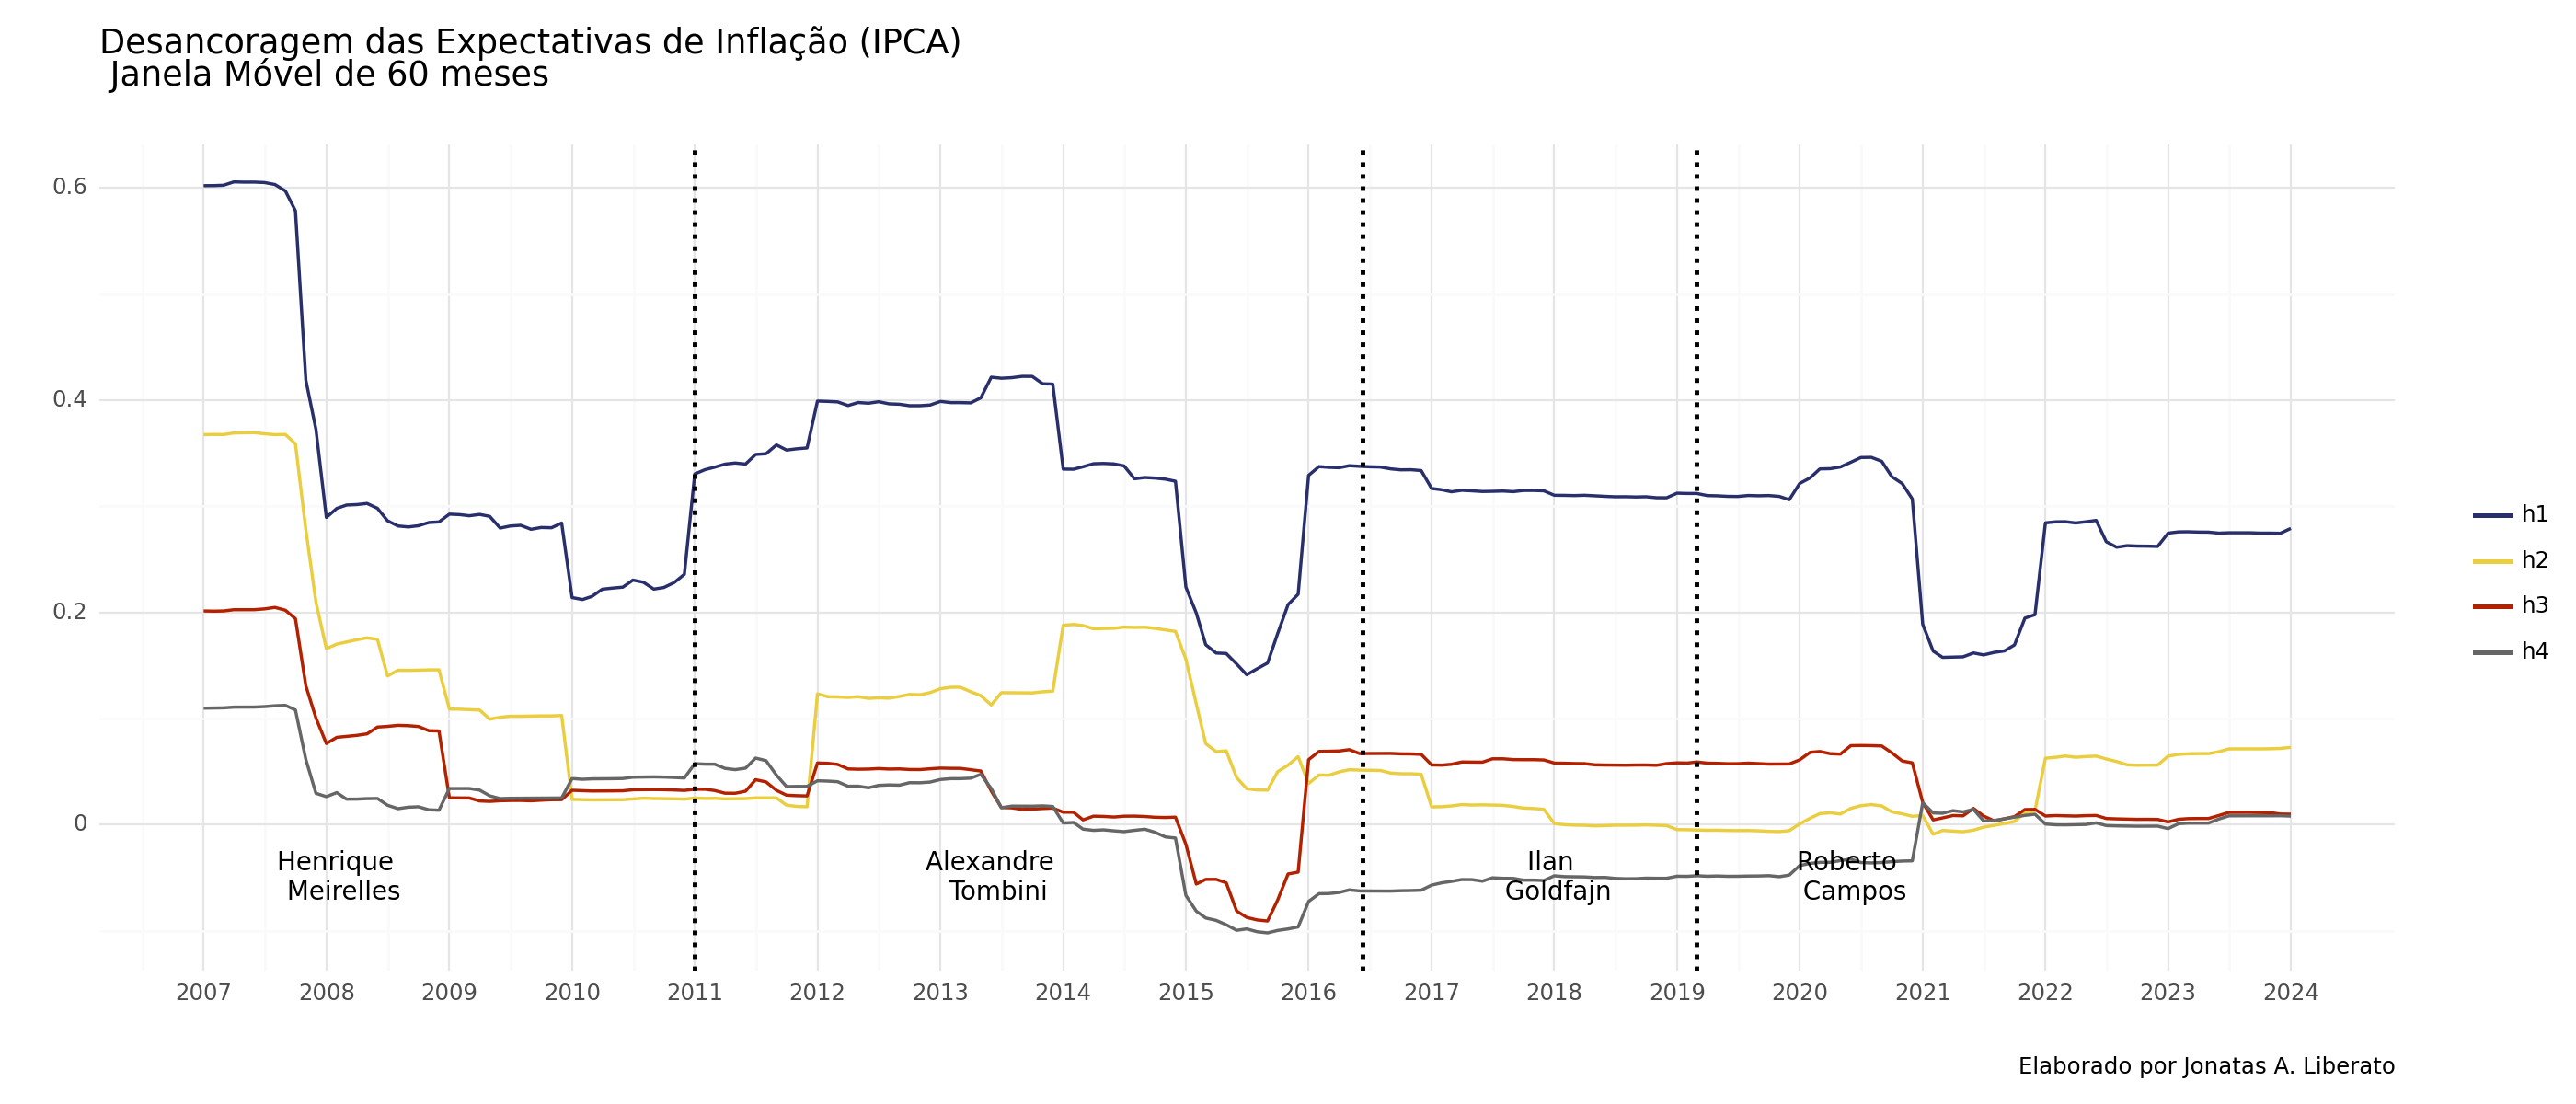

<Figure Size: (1400 x 600)>

In [76]:
# Criação do gráfico utilizando ggplot
(
ggplot(beta, aes(x='data', y='beta', color='variables')) +  # Mapeamento de variáveis para eixo x, y e cor
geom_line(size=0.7) +  # Adição da camada de linha com espessura 0.7
scale_colour_manual(values=list(colors.values())) +  # Personalização das cores manualmente
scale_x_date(date_breaks="1 year", date_labels="%Y") +  # Configuração do eixo x para exibir intervalos anuais
geom_vline(xintercept=['2010-12-31', '2016-06-09', '2019-02-28'], linetype='dotted', size=[1, 1, 1]) +  # Adição de linhas verticais pontilhadas
annotate(
    geom='text',
    x='2008-02-09',
    y=-0.05,
    label='Henrique \n Meirelles',
    size=10) +  # Adição de texto explicativo na posição especificada
annotate(
    geom='text',
    x='2013-06-09',
    y=-0.05,
    label='Alexandre \n Tombini',
    size=10) +  # Adição de texto explicativo na posição especificada
annotate(
    geom='text',
    x='2018-01-01',
    y=-0.05,
    label='Ilan \n Goldfajn',
    size=10) +  # Adição de texto explicativo na posição especificada
annotate(
    geom='text',
    x='2020-06-01',
    y=-0.05,
    label='Roberto \n Campos',
    size=10) +  # Adição de texto explicativo na posição especificada
labs(
    title=f"Desancoragem das Expectativas de Inflação (IPCA) \n Janela Móvel de {k} meses",  # Adição de título ao gráfico
    color='',
    x='',
    y='',
    caption='Elaborado por Jonatas A. Liberato') +  # Adição de legenda
theme_minimal() +  # Aplicação de tema minimalista
theme(figure_size=(14, 6))  # Configuração do tamanho da figura
)


### 2. 8 Conclusão

A análise do gráfico revela alguns pontos importantes. Destaca-se a estabilidade do coeficiente durante o mandato de Ilan Goldfajn à frente da autoridade monetária. Além disso, apesar de um pico no final de 2019, não ocorreu uma desancoragem significativa das expectativas de inflação durante o período de Campos Neto. Desde o final do mandato de Tombini, o coeficiente tem mantido um controle razoável.

A observação original do FMI sobre a suscetibilidade das expectativas de curto prazo a ruídos conjunturais é corroborada pelo gráfico, mostrando uma relativa estabilidade nas expectativas para t+2 e t+3. Qualquer quebra nessa estabilidade implicaria desafios para a própria ideia da meta de inflação, considerando a dificuldade em fazer previsões precisas para prazos superiores a 12 meses.

Já no periodo Campos Neto, houve muito ruído devido à chegada da Pandemia em 2020, depois que foi adotada a independência do BACEN em 2021, tivemos uma certa etabilidade.

# 3.0 Juro Real x Juro Neutro

A questão mais polêmica de todos os tempos (exagerando).



Aqui destacamos a relevância do juro real e da taxa de juros neutra na orientação da política monetária pelo Banco Central. Na abordagem contemporânea, a política é considerada **expansiva** quando o *juro real* está *abaixo da taxa neutra* e **contracionista** quando está acima. 

A taxa neutra representa a **estabilidade da inflação** ao longo do tempo, sendo uma variável não observável e sujeita a estimativas. 

É aí que a responsabilidade do Banco Central vem à tona. Pois deve se utilizar de ferramentas afim de manter o juro real próximo à taxa neutra para atingir o objetivo de controle da inflação.

> **Conceitos**<br>

- **Juro Real:**<br>
É a taxa de juros que leva em conta os efeitos inflacionários, um exemplo: <br>
Se um banco oferece 5% de juros e a inflação é de 3%, o juro real seria de 2%.

**Como obtemos:** <br>
Em conceito mais técnico, o juro real é o **juro real ex-ante**, que pode ser obtido a partir do juro do **swap DI 360** deflacionado pela *expectativa de inflação para os próximos 12 meses*.

**Por que é importante:** <br>
Ajuda nos ajuda a entender o ganho ou a perda real do dinheiro, considerando o aumento ou queda dos preços.

--

- **Juro Neutro:**<br>
É a taxa de juros que não tem o poder de 'acelerar ou frear' a economia, que corresponde a um equilíbrio. Por exemplo: <br>
Se a taxa d juros em em torno de 6% e a economia está em expansão, dizemos que a taxa neutra é esses 6%.

**Como obtemos:**<br>
Segue as diretrizes definidas no *Relatório de Inflação*, dada pela *Selic esperada para t+3 (3 anos à frente)* e *deflacionada pela inflação esperada para t+3*.

**Por que é importante:** <br>
Nos permite avaliar se a taxa de juros está estimulando demais a economia local(ocasionando o riso de inflação) ou a desestimulando (recessão).

In [77]:
from bcb import Expectativas
from datetime import datetime
from datetime import timedelta

### 3.1 Funções para ajuste de datas

A função `subtrai_data` cria uma espécie de "máquina do tempo", subtraindo 10 anos da data atual e retornando o resultado como uma string no formato "YYYY-MM-DD". Enquanto isso, a função `data_refer` calcula a data de referência, adicionando 3 anos à data de observação fornecida, retornando esses anos como uma lista de strings.

In [78]:
# Função que subtrai 10 anos da data atual
def subtrai_data(days):
    # Obtém a data atual, subtraindo 10 anos
    sub_year_days = pd.to_datetime(datetime.today().strftime('%Y-%m-%d')) - timedelta(days=10 * 365)
    # Formata a data para o padrão "YYYY-MM-DD"
    sub_year_days = sub_year_days.strftime("%Y-%m-%d")
    return sub_year_days


# Função para calcular uma data de referência 3 anos à frente da data de entrada
def data_refer(date):
    # Obtém o ano da data de entrada e adiciona 3 anos
    years = pd.DatetimeIndex(date).year.values + 3
    # Converte para uma lista de strings
    years = [str(i) for i in years]
    return years

### 3.2 Conexão à API do BACEN

Aqui nos conectamos a uma API de Expectativas de Mercado Anuais usando a biblioteca `python-bcb` que coleta informações sobre as expectativas do Índice Nacional de Preços ao Consumidor Amplo (IPCA) para os últimos 10 anos. São aplicados filtros específicos, como indicador "IPCA", data superior a 10 anos atrás, e base de cálculo igual a zero.

Os dados brutos (`ipca_raw`) são então filtrados novamente para incluir apenas as observações cuja data de referência seja 3 anos à frente da data de observação (`data_refer`). As colunas são renomeadas para você, pessoa querida, melhor entender e algumas colunas são removidas para simplificar a estrutura (`ipca`).

In [79]:
# Conecta com a API das Expectativas de Mercado Anuais
em = Expectativas()
exp_merc = em.get_endpoint('ExpectativasMercadoAnuais')

# Coleta dados brutos sobre as expectativas de IPCA anuais
ipca_raw = (
    exp_merc.query()
    .filter(exp_merc.Indicador == "IPCA")
    .filter(exp_merc.Data >= subtrai_data(10 * 365))  # Filtra dados dos últimos 10 anos
    .filter(exp_merc.baseCalculo == 0)
    .select(exp_merc.Data, exp_merc.Mediana, exp_merc.Minimo, exp_merc.Maximo, exp_merc.DataReferencia)
    .collect()
)

# Filtra os dados para a data de referência 3 anos à frente da data de observação
ipca = ipca_raw[(
    ipca_raw
    .DataReferencia == data_refer(ipca_raw['Data'])
)]

# Renomeia colunas e ajusta o DataFrame final
ipca = ipca.rename(columns={'Data': 'date',
                            'Mediana': 'ipca_e',
                            'Minimo': 'ipca_e_min',
                            'Maximo': 'ipca_e_max'}).drop(['DataReferencia'], axis=1)


Aqui seguimos uma abordagem semelhante àquela aplicada ao IPCA, mas agora foca nas expectativas da Taxa Selic. Ele coleta dados brutos (`selic_raw`) da API, filtrando as expectativas da Selic para os últimos 10 anos, aplicando os mesmos critérios de indicador, data e base de cálculo.

Os dados brutos são então filtrados novamente para incluir apenas as observações cuja data de referência seja 3 anos à frente da data de observação. As colunas são renomeadas para melhor compreensão e algumas são removidas para simplificar a estrutura (`selic`).

### 3.3 Obtenção dos Dados e organização

In [80]:
# Coleta dados brutos sobre as expectativas da taxa Selic anuais
selic_raw = (
    exp_merc.query()
    .filter(exp_merc.Indicador == "Selic")
    .filter(exp_merc.Data >= subtrai_data(10 * 365))  # Filtra dados dos últimos 10 anos
    .filter(exp_merc.baseCalculo == 0)
    .select(exp_merc.Data, exp_merc.Mediana, exp_merc.Minimo, exp_merc.Maximo, exp_merc.DataReferencia)
    .collect()
)

# Filtra os dados para a data de referência 3 anos à frente da data de observação
selic = selic_raw[(
    selic_raw
    .DataReferencia == data_refer(selic_raw['Data'])
)]

# Renomeia colunas e ajusta o DataFrame final para dados da taxa Selic
selic = selic.rename(columns={'Data': 'date',
                              'Mediana': 'selic_e',
                              'Minimo': 'selic_e_min',
                              'Maximo': 'selic_e_max'}).drop(['DataReferencia'], axis=1)


Criamos um DataFrame chamado `df_unificado` ao combinar (merge) os dados do IPCA (`ipca`) e da Taxa Selic (`selic`). A junção é realizada utilizando a coluna 'date' como chave de ligação, considerando apenas as observações presentes em ambas as tabelas (inner join). Essa fusão permite ter em um único DataFrame as informações tanto sobre as expectativas do IPCA quanto da Taxa Selic, compartilhando a mesma coluna de data ('date').

In [81]:
# Combinação (merge) dos DataFrames de IPCA e Selic para criar o DataFrame df_unificado
df_unificado = pd.merge(left=ipca,
                        right=selic,
                        how='inner',
                        on='date')

### 3.4 Função de Fisher

Em economia, a "função de Fisher" refere-se a duas ideias principais associadas ao economista Irving Fisher:

1. **Equação de Fisher para a Taxa de Juros Nominal e Real:**
   - Fisher propôs uma equação que relaciona a taxa de juros nominal, a taxa de inflação e a taxa de juros real. A equação é geralmente expressa como \(1 + i = (1 + r) \times (1 + \pi)\), onde:
     - \(i\) é a taxa de juros nominal,
     - \(r\) é a taxa de juros real (ajustada pela inflação),
     - \(\pi\) é a taxa de inflação.

2. **Fórmula de Fisher para o Ajuste Monetário:**
   - func_fisher também desenvolveu a "fórmula de Fisher" para ajuste monetário. Ela é usada para calcular a quantidade de dinheiro real após levar em consideração a inflação. A fórmula é \(M \times V = P \times Q\), onde:
     - \(M\) é a oferta de dinheiro,
     - \(V\) é a velocidade do dinheiro (frequência com que o dinheiro muda de mãos),
     - \(P\) é o nível de preços,
     - \(Q\) é a quantidade de bens e serviços.

A função de Fisher é crucial para entender as relações entre taxas de juros nominais, taxas de inflação e taxas de juros reais, desempenhando um papel significativo na teoria econômica monetária e na análise das condições financeiras de uma economia.

In [82]:
# Função para calcular a taxa de juros neutra usando a fórmula de Fisher
def func_fisher(juros, inflacao):
    # Fórmula de Fisher para calcular a taxa de juros neutra
    juros_neutro = ((((1 + (juros / 100)) / (1 + inflacao / 100))) - 1) * 100
    return juros_neutro

### 3.5 Taxa de Juros Neutros

Neste trecho do código, o objetivo é calcular e adicionar três novas colunas representando o juro neutro em diferentes cenários (mediano, mínimo e máximo). Isso é feito utilizando a função `fisher` para ajustar a Taxa Selic pela expectativa do IPCA.

Além disso, há a reorganização do DataFrame para facilitar análises futuras, incluindo a definição da coluna de data como índice e o reamostramento para média mensal. Esse processo visa suavizar os dados e permitir uma compreensão mais clara das tendências mensais no juro neutro em relação às expectativas de IPCA e Selic.

In [83]:
# Calcula as taxas de juros neutras e adiciona ao DataFrame df_unificado
df_unificado = df_unificado.assign(neutro=lambda x: func_fisher(x.selic_e, x.ipca_e),
                                   neutro_min=lambda x: func_fisher(x.selic_e_min, x.ipca_e_min),
                                   neutro_max=lambda x: func_fisher(x.selic_e_max, x.ipca_e_max))

# Define o índice como data, converte para o formato de período diário e realiza a média mensal
df_unificado = df_unificado.set_index(pd.to_datetime(df_unificado['date']).dt.to_period('D')).drop(['date'], axis=1)
df_unificado = df_unificado.resample('M').mean()

In [84]:
# !pip install ipeadatapy
import ipeadatapy as ip

### 3.6 Taxa Referencial

Aqui coletamos os dados sobre a Taxa Referencial relacionada a swaps DI pré-fixados com vencimento em até 360 dias, obtidos da série temporal 'BMF12_SWAPDI36012'. Renomeamos a coluna para 'swaps' e, em seguida, o índice do DataFrame é ajustado para representar períodos mensais.

O objetivo principal é obter informações sobre as taxas de juros referentes a esses swaps DI pré-fixados para análises subsequentes. A formatação do índice para representar períodos mensais simplifica a compreensão das tendências ao longo do tempo.

In [85]:
# Coleta dados sobre a taxa referencial - swaps - DI pré-360 dias
swaps = (
    ip.timeseries('BMF12_SWAPDI36012')
    .rename(columns={'VALUE ((% a.a.))': 'swaps'})[['swaps']]
)

# Define o índice como período mensal
swaps = swaps.set_index(swaps.index.to_period('M'))

### 3.7 Expectativas

Ajustamos os dados relacionados à expectativa de inflação para um período de 12 meses. Convertemos data onvertida para o formato de datetime, e o DataFrame é indexado por essa coluna transformada em um período diário. A coluna referente à mediana da expectativa de inflação 'Mediana' é renomeada para `'ipca_exp_12m'`. A seleção é feita para incluir apenas a coluna renomeada, resultando em um novo DataFrame contendo as expectativas de inflação para 12 meses. Por fim, utilizamos o método `resample`, os dados são mensalizados através da média dos valores, agregando as informações para representar a média mensal das expectativas de inflação.

In [86]:
# Obtém as expectativas de inflação para 12 meses
ipca_expec = em.get_endpoint('ExpectativasMercadoInflacao12Meses')

# Coleta dados brutos sobre as expectativas de IPCA suavizadas para 12 meses
ipca_exp_12meses_raw = (
    ipca_expec.query()
    .filter(ipca_expec.Suavizada == 'S', ipca_expec.baseCalculo == 0, ipca_expec.Indicador == 'IPCA')
    .collect()
)

# Ajusta o DataFrame com data como índice e renomeia a coluna
ipca_exp_12meses = (
    ipca_exp_12meses_raw
    .set_index(pd.to_datetime(ipca_exp_12meses_raw['Data']).dt.to_period('D'))
    .rename(columns={'Mediana': 'ipca_exp_12m'})
    [['ipca_exp_12m']]
)

# Mensaliza os dados com base na média dos valores
ipca_exp_12meses = ipca_exp_12meses.resample('M').mean()

O trecho de código junta as expectativas de inflação para 12 meses com os dados dos swaps DI pré-fixados. Em seguida, calculamos a taxa de juros real usando a função `fisher`, ajustando as taxas de swaps pela expectativa de inflação. O objetivo é combinar informações sobre inflação e taxas de juros para análises subsequentes, fornecendo uma visão mais abrangente das condições do mercado financeiro.

Aqui usamos o termo ex_ante, então cabe uma breve explicação típica de economês:

1. **Ex Ante:**
   - *Significado:* Em latim, "ex ante" significa "antes do evento" ou "antes do fato".
   - *Explicação:* Quando falamos em termos ex ante, estamos nos referindo a análises, decisões ou previsões feitas antes de um evento ocorrer. É como se fosse uma visão prévia ou uma avaliação antecipada baseada em informações disponíveis até aquele momento.
   - *Exemplo:* Antes de investir dinheiro em ações, alguém pode fazer uma análise ex ante considerando fatores como o desempenho passado da empresa, as condições do mercado e as previsões econômicas.

2. **Ex Post:**
   - *Significado:* Em latim, "ex post" significa "depois do evento" ou "depois do fato".
   - *Explicação:* Quando nos referimos a algo ex post, estamos falando sobre análises, avaliações ou decisões feitas após a ocorrência de um evento. Nesse caso, já se tem conhecimento dos resultados e das condições reais que se desdobraram.
   - *Exemplo:* Após investir em ações, uma pessoa pode fazer uma análise ex post para avaliar como as ações se saíram, comparando os resultados reais com as expectativas iniciais.

Em resumo, "ex ante" refere-se ao que é feito antes de um evento acontecer, enquanto "ex post" refere-se ao que é feito após o evento ter ocorrido. Ambos os termos são frequentemente utilizados em diversas áreas, como finanças, economia e planejamento, para descrever diferentes abordagens de análise temporal.

### 3.8 Criando o DataFrame

In [87]:
# Combina os DataFrames ipca_exp_12meses e swaps para criar o DataFrame ex_ante
ex_ante = ipca_exp_12meses.join(swaps)

# Adiciona a coluna juro_real usando a função fisher
ex_ante = ex_ante.assign(juro_real=lambda x: func_fisher(x.swaps, x.ipca_exp_12m))

O código cria um DataFrame `df_juros` ao unir (`join`) os dados de `df_unificado` e `ex_ante`. Nós selecionamos as colunas de interesse para isso e as renomeamos; Depois, ajustamos o índice do DataFrame para representar carimbos temporais mensais. O objetivo é consolidar as informações sobre juros reais e juros neutros para análises posteriores, proporcionando uma visão mais abrangente das condições do mercado financeiro.

In [88]:
# Combina os DataFrames df_unificado e ex_ante para criar o DataFrame df_juros
df_juros = (
    df_unificado
    .join(ex_ante)
    [['juro_real', 'neutro']]
    .rename(columns={'juro_real': 'Juro Real',
                     'neutro': 'Juro Neutro'})
)

# Converte o índice para o formato de carimbo de data-tempo com frequência mensal
df_juros.index = df_juros.index.to_timestamp(freq='M')

Transformamos `df_juros` em um formato longo, criando um novo DataFrame chamado `df_juros_long`com o uso da função `melt` e mantemos a coluna de data ('date') como índice, enquanto as colunas 'Juro Real' e 'Juro Neutro' são transformadas em uma variável chamada 'variable', e os valores correspondentes são agrupados em uma coluna chamada 'values'. Essa reestruturação facilita a visualização e análise dos dados em certos contextos.

In [89]:
# Transforma o DataFrame df_juros de formato largo para longo usando a função melt
df_juros_long = pd.melt(df_juros.reset_index(),
                        id_vars='date',
                        value_vars=['Juro Real', 'Juro Neutro'],
                        var_name='variable',
                        value_name='values')

### 3.9 Plotando

Hora do plot!

Definimos dicionários de cores e temas para criar um gráfico de linhas comparando as variáveis 'Juro Real' e 'Juro Neutro' com o objetivo de visualizar e comparar as tendências entre as duas variáveis de juros.

Text(1.0, -0.06, 'Fonte: Ipeadata | Autor: Jonatas A. Liberato')

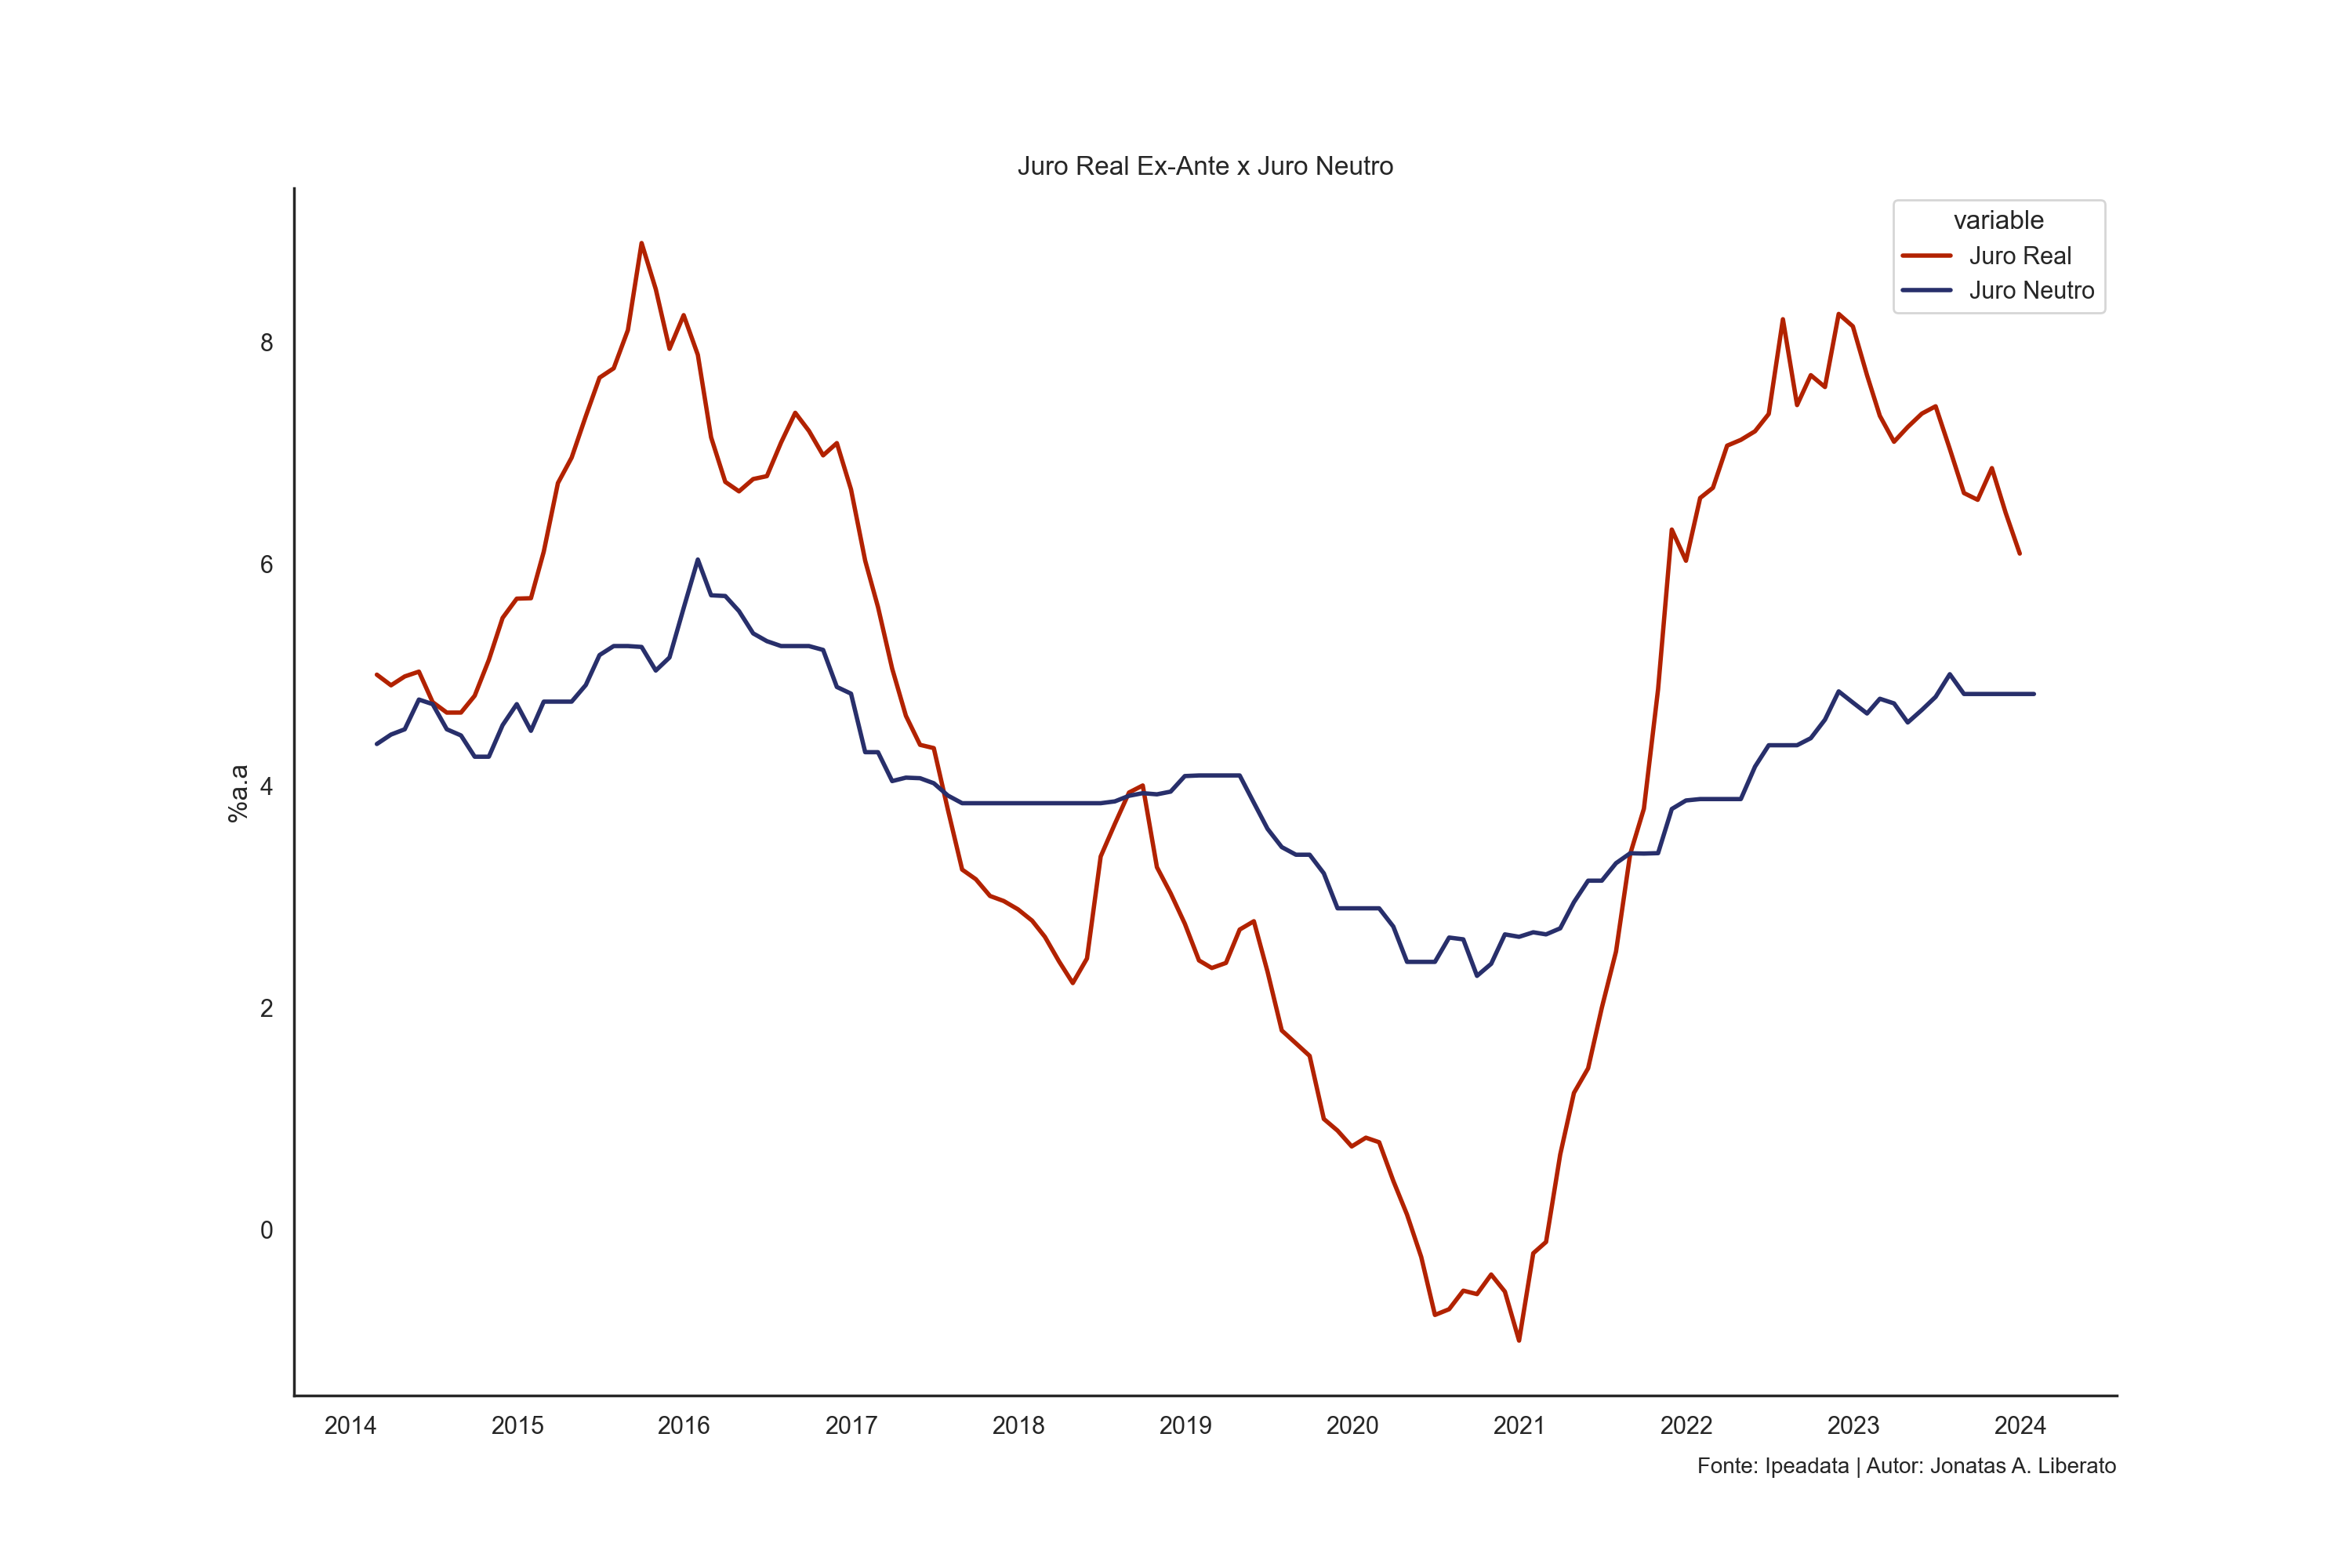

In [90]:
# Configurações de estilo para o gráfico
theme = {'figure.figsize': (15, 10),
         'axes.facecolor': 'white',
         "axes.spines.right": False,
         "axes.spines.top": False}

# Cores para as linhas no gráfico
colors = ['#b22200', '#282f6b']

# Aplica as configurações de estilo usando o seaborn
sns.set_theme(style='white',
              palette=colors,
              rc=theme)

# Cria um gráfico de linha usando seaborn
sns.lineplot(x='date', y='values',
             data=df_juros_long,
             hue='variable',
             linewidth=2).set(xlabel="",
                              ylabel="%a.a",
                              title="Juro Real Ex-Ante x Juro Neutro")

# Adiciona uma anotação para indicar a fonte dos dados
plt.annotate('Fonte: Ipeadata | Autor: Jonatas A. Liberato',
             xy=(1.0, -0.06),
             xycoords='axes fraction',
             ha='right',
             va="center",
             fontsize=10)


### 3.10 Conclusão

A partir de 2017 tivemos uma derrocada do juro real, chegando a patamares que foram muito discutidos por economistas perante ao nível Brasil em comparação aos pares. Queda essa revertida A partir de 2021 quando o BACEN se utilizou dessa ferramenta para elevar a taxa de juros com o objetivo de controlar a oferta monetária.

# 4.0 Deflação

Na primeira parte desse estudo, falamos brevemente sobre "Deflação", que é como se a gente tivesse um "preço reverso" nas coisas. Imagine que, em vez de as coisas ficarem mais caras ao longo do tempo (que é o que geralmente acontece), elas fiquem mais baratas. Isso é a deflação.

Então, se você tivesse R$ 100 hoje, com a deflação, você poderia comprar mais coisas no futuro do que poderia comprar hoje com a mesma quantia. Parece bom, né? Mas, na verdade, a deflação constante pode ser um problema para a economia.

Quando as coisas ficam mais baratas, as empresas podem ganhar menos dinheiro, e as pessoas podem adiar as compras, pensando que os preços vão baixar ainda mais. Isso pode fazer com que a economia desacelere, as empresas contratem menos pessoas e, em geral, as coisas podem ficar um pouco complicadas.

Então, embora seja legal poder comprar mais com o mesmo dinheiro, a deflação constante pode trazer alguns desafios para a economia. O equilíbrio é importante!

E para entendermos melhor esse fenômeno, utilizaremos o mesmo mês em anos diferentes e vamos explorar essa anomalia, construindo um gráfico que represente a inflação nos meses de setembro ao longo de vários anos.

In [91]:
import sidrapy as sidra
import pandas as pd

### 4.1 Obtendo tratando os dados

In [92]:
# Obtendo os dados referentes ao IPCA através do velho SIDRA
ipca_raw = list(
    map(
        lambda tabela, variavel : (
            sidra.get_table(
                table_code = tabela,
                territorial_level= '1',
                ibge_territorial_code= 'all',
                variable = variavel,
                classifications = {
                    '315': '7171'
                    },
                period = 'all',
                header = 'n'
                )
            ),
        ['655', '2938', '1419', '7060'],
        ['all', '63', '63', '63']
    )
)
ipca_raw

[   NC      NN MC MN      V D1C     D1N     D2C             D2N D3C  \
 0   1  Brasil  2  %   0.17   1  Brasil  199908     agosto 1999  63   
 1   1  Brasil  2  %   0.42   1  Brasil  199909   setembro 1999  63   
 2   1  Brasil  2  %   2.30   1  Brasil  199910    outubro 1999  63   
 3   1  Brasil  2  %   1.66   1  Brasil  199911   novembro 1999  63   
 4   1  Brasil  2  %   1.55   1  Brasil  199912   dezembro 1999  63   
 .. ..     ... .. ..    ...  ..     ...     ...             ...  ..   
 78  1  Brasil  2  %  -0.52   1  Brasil  200602  fevereiro 2006  63   
 79  1  Brasil  2  %  -0.38   1  Brasil  200603      março 2006  63   
 80  1  Brasil  2  %  -0.51   1  Brasil  200604      abril 2006  63   
 81  1  Brasil  2  %  -0.22   1  Brasil  200605       maio 2006  63   
 82  1  Brasil  2  %  -0.92   1  Brasil  200606      junho 2006  63   
 
                        D3N   D4C                          D4N  
 0   IPCA - Variação mensal  7171  11.Alimentação no domicílio  
 1   IPCA - Vari

In [93]:
# Concatenando e atribuindo nomes aos níveis do índice
ipca_set = (
    pd.concat(
        objs=ipca_raw,
        names=['tabela', 'linha']
    )
    .reset_index()
    # Filtrando somente pelas colunas de data e valor do IPCA  
    .filter(items=['D2C', 'V'], axis='columns')
    # Convertendo a data em datetime e IPCA em ponto flutuante (float)
    .assign(
        data=lambda x: pd.to_datetime(x['D2C'], format='%Y%m'),
        valor=lambda x: x['V'].astype(float)
    )
    .filter(items=['data', 'valor'], axis='columns')
    .rename(columns={'data': 'date', 'valor': 'ipca'})
)

# Selecionando apenas os meses de setembro
ipca_set_september = ipca_set[ipca_set['date'].dt.month == 9]

# Exibindo o DataFrame resultante
ipca_set_september

,date,ipca
1,1999-09-01,0.42
13,2000-09-01,0.61
25,2001-09-01,0.19
37,2002-09-01,2.36
49,2003-09-01,0.93
61,2004-09-01,-0.31
73,2005-09-01,-0.50
85,2006-09-01,0.10
97,2007-09-01,0.39
109,2008-09-01,-0.88


### 4.2 Plot nosso de cada dia

In [94]:
import pandas as pd
import plotly.express as px

# Adiciona uma coluna 'color' com base na condição 'ipca' < 0
ipca_set_september['color'] = ipca_set_september['ipca'] < 0

# Criando um gráfico de barras usando Plotly Express
fig = px.bar(ipca_set_september, x='date', y='ipca',
             title='Inflação medida pelo IPCA em setembro',
             labels={'ipca': '% a.m.', 'date': ''},
             text='ipca',
             color='color',  # Usa a coluna 'color' para a cor
             color_discrete_map={True: 'red', False: 'darkblue'},  # Mapeia cores para valores específicos
             )

# Personalizando o layout
fig.update_layout(xaxis=dict(tickmode='array', tickvals=list(ipca_set_september['date']),
                              ticktext=ipca_set_september['date'].dt.strftime('%b/%Y').tolist(),
                              tickangle=45, dtick='M1'),
                  showlegend=False,
                  annotations=[dict(text='Fonte: SIDRA | Autor: Jonatas A. Liberato', showarrow=False,
                                    xref='paper', yref='paper', x=1, y=1.1, xanchor='right', yanchor='bottom')],
                  height=600, width=1200)

# Exibindo o gráfico
fig.show()


Observa-se que houveram 11 dos 23 anos da amostra em que o fenômeno foi identificado, o que torna-se preocupante devido aos efeitos da irmã da Inflação.

### 4.4 Plot para investigar as tendências por ano

In [95]:
ipca_full = (
    pd.concat(
        # Concatenamos e atribuímos nomes aos níveis do índice
        objs=ipca_raw,
        names=['tabela', 'linha']
    )
    .reset_index()
    # Filtramos somente pelas colunas de data e valor do IPCA  
    .filter(items=['D2C', 'V'], axis='columns')
    # Aqui convertemos a data em datetime e IPCA em ponto flutuante (float)
    .assign(
        data=lambda x: pd.to_datetime(x['D2C'], format='%Y%m'),
        valor=lambda x: x['V'].astype(float)
    )
    .filter(items=['data', 'valor'], axis='columns')
    .rename(columns={'data': 'date', 'valor': 'ipca'})
)
ipca_full

,date,ipca
0,1999-08-01,0.17
1,1999-09-01,0.42
2,1999-10-01,2.30
3,1999-11-01,1.66
4,1999-12-01,1.55
...,...,...
288,2023-08-01,-1.26
289,2023-09-01,-1.02
290,2023-10-01,0.27
291,2023-11-01,0.75


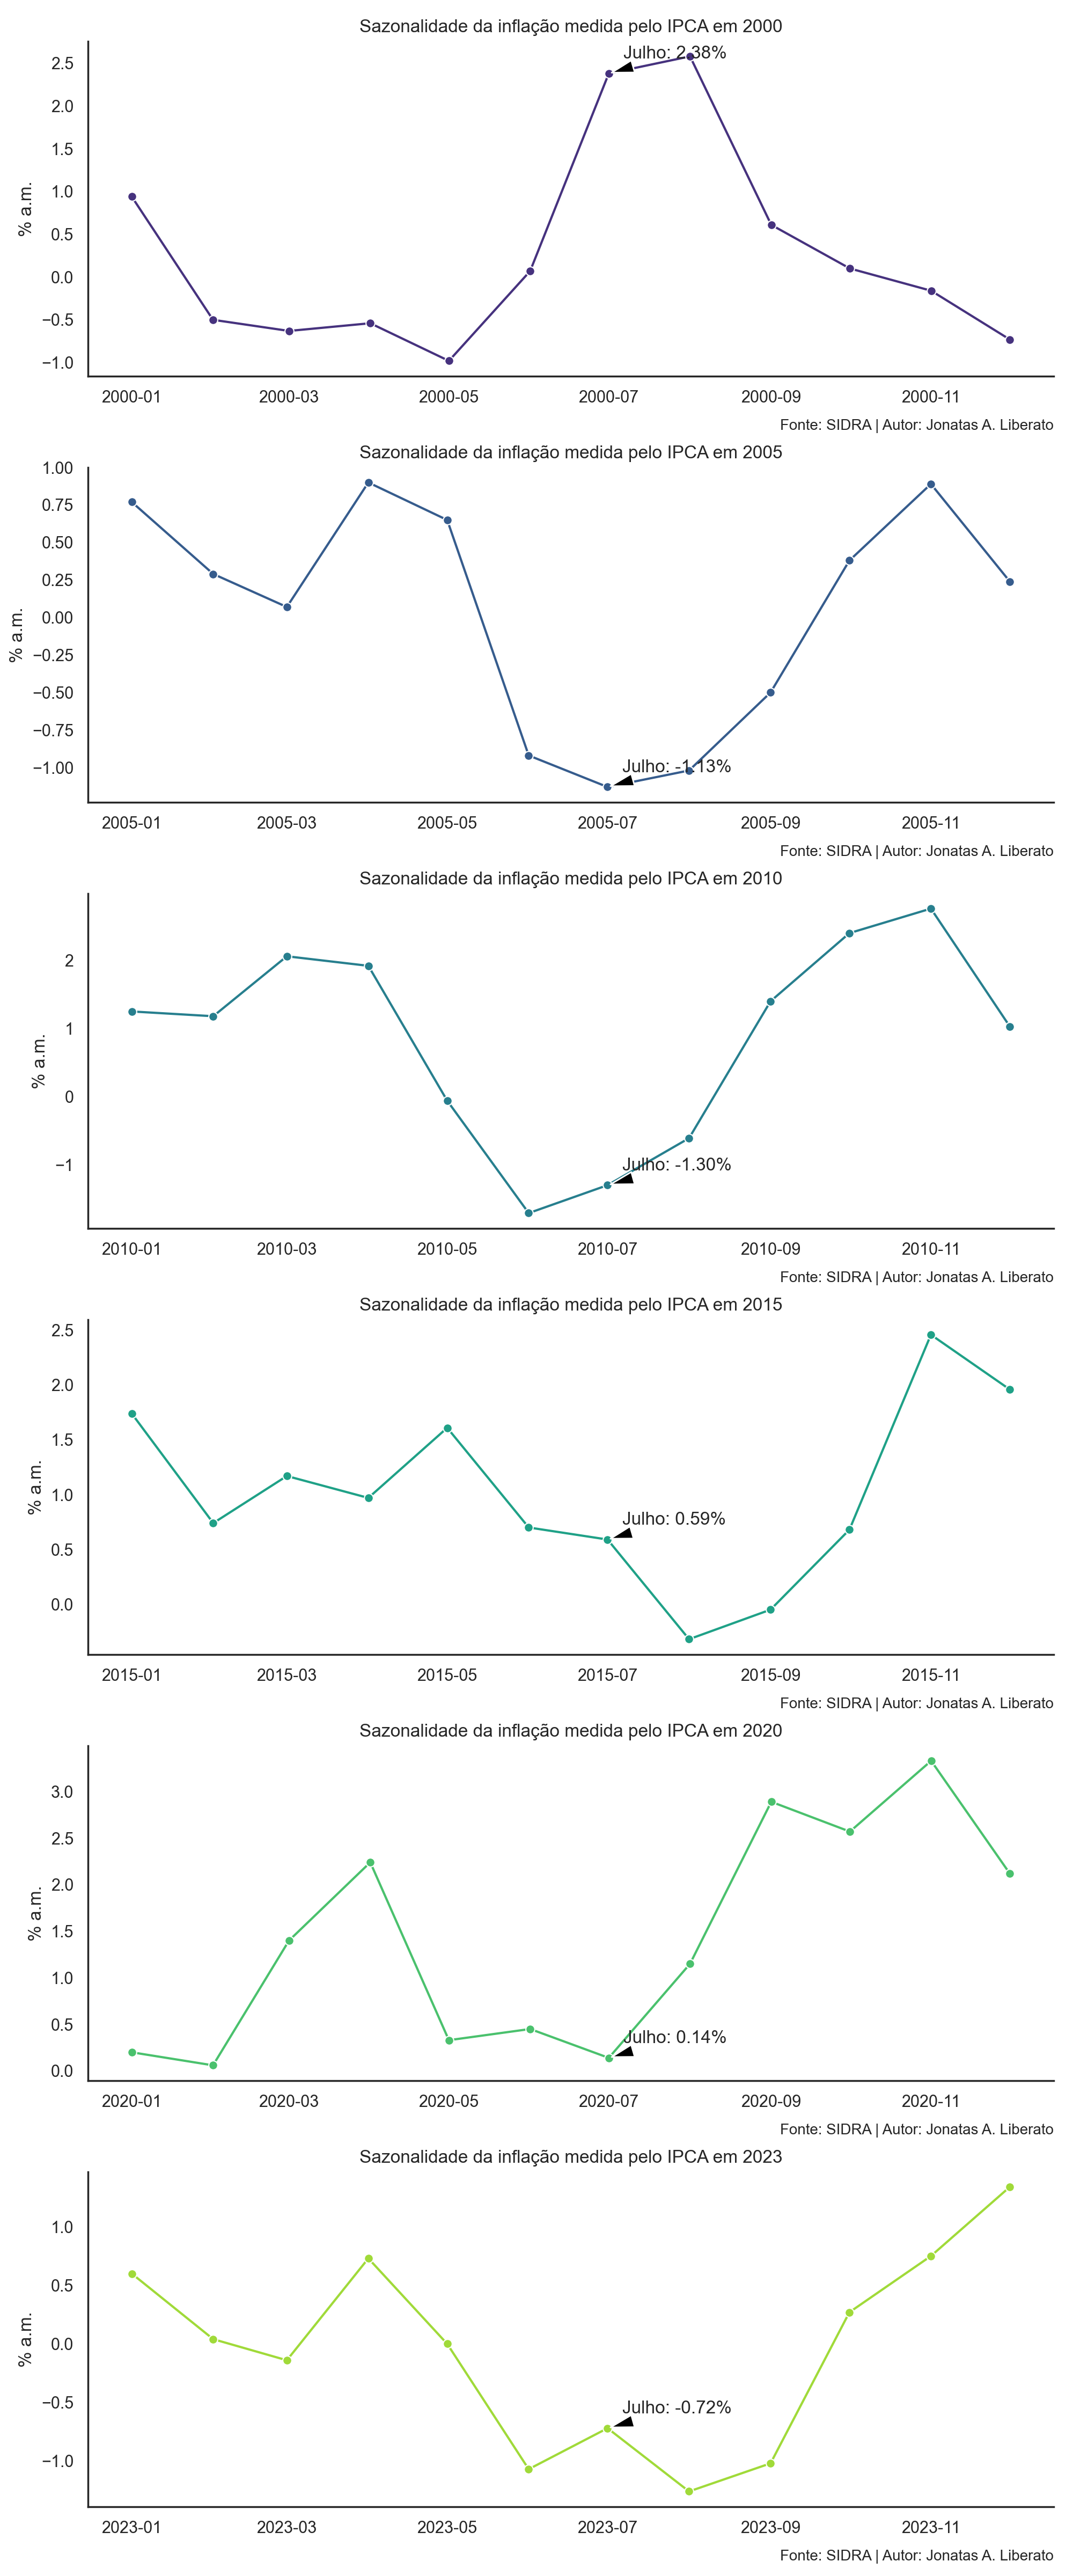

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de anos desejados
anos_desejados = [2000, 2005, 2010, 2015, 2020, 2023]

# Subplots para cada ano
fig, axs = plt.subplots(nrows=len(anos_desejados), figsize=(10, 4 * len(anos_desejados)))

# Paleta de cores diferente para cada ano (usando 'viridis')
paleta_cores = sns.color_palette('viridis', len(anos_desejados))

# Iteração sobre os anos desejados
for i, (ano, cor) in enumerate(zip(anos_desejados, paleta_cores)):
    # Filtra os dados para o ano específico
    ipca_mensal_ano = ipca_full[
        (ipca_full['date'] >= f'{ano}-01-01') & (ipca_full['date'] < f'{ano + 1}-01-01')
    ]

    # Gráfico de sub-séries
    sns.lineplot(x='date', y='ipca', data=ipca_mensal_ano, marker='o', color=cor, ax=axs[i])

    # Observação para o mês de julho
    julho = ipca_mensal_ano[ipca_mensal_ano['date'].dt.month == 7]
    axs[i].annotate(
        f"Julho: {julho['ipca'].values[0]:.2f}%",
        xy=(julho['date'].values[0], julho['ipca'].values[0]),
        xytext=(10, 10),
        textcoords='offset points',
        arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', lw=1),
    )

    # Layout
    axs[i].set_xlabel('')
    axs[i].set_ylabel('% a.m.')
    axs[i].set_title(f'Sazonalidade da inflação medida pelo IPCA em {ano}')
    axs[i].annotate(
        'Fonte: SIDRA | Autor: Jonatas A. Liberato',
        xy=(1.0, -0.15),
        xycoords='axes fraction',
        ha='right',
        va='center',
        fontsize=10,
    )

# Ajusta o layout
plt.tight_layout()

# Exibe os gráficos
plt.show()


### 4.4 Conclusão 

Tivemos diversos períodos de deflação nas últimas décadas e o último gráfico mostra que em somente em 2000 não tivemos uma aceleração da inflação após a metade do ano, uma tendência verificadas em alguns estudos sobre o tema.

# 5.0 Núcleos de Inflação

O núcleo de inflação, também conhecido como inflação subjacente, é uma métrica que busca identificar a tendência dos preços, excluindo distúrbios provenientes de choques temporários. Essa medida visa detectar mudanças fundamentais nos preços, como pressões de demanda, choques permanentes ou alterações nas expectativas de inflação. 

Ela é essencial para orientar a política monetária, o núcleo ajuda as autoridades a identificar choques que afetam a inflação, excluindo choques temporários de oferta. Existem várias metodologias para calcular o núcleo, incluindo a exclusão de componentes voláteis, como alimentos e energia, e o uso de estimadores de influência limitada, como mediana ponderada e média aparada. 

Abordagens mais recentes envolvem técnicas econométricas, como filtros de suavização e modelos auto-regressivos estruturais. O núcleo é crucial em ambientes de metas de inflação, auxiliando na estabilidade de preços como principal objetivo da política monetária.

In [97]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

### 5.1 Funções para tratamento dos dados

In [98]:
# Função para obter o código da série através da API do Bacen
def codigo_bc(codigo):
    # Constrói a URL para consulta da série temporal
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
    # Faz uma requisição à API do Bacen
    response = requests.get(url)
    # Converte a resposta para formato JSON
    json_data = response.json()
    # Converte os dados JSON em um DataFrame pandas
    df = pd.DataFrame(json_data)
    # Converte a coluna 'data' para o formato de data
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    # Renomeia as colunas para 'data' e 'valor'
    df.columns = ['data', 'valor']
    return df

# Função que obter uma série anual do IPCA
def ipca_anualizado(ipca_raw):
    # Verifica se as colunas 'data' e 'valor' existem no DataFrame
    if 'data' in ipca_raw.columns and 'valor' in ipca_raw.columns:
        # Armazena as datas em uma variável
        dates = ipca_raw['data']
        # Mantém apenas a coluna 'valor'
        ipca_raw = ipca_raw['valor']
    else:
        # Se não existirem, define 'dates' como None
        dates = None

    # Converte os valores para formato numérico
    ipca_raw = pd.to_numeric(ipca_raw)
    # Realiza o cálculo da variação anualizada
    ipca_raw = (ipca_raw / 100 + 1)
    ipca_raw = ipca_raw ** 12
    ipca_raw = (ipca_raw - 1) * 100

    # Cria um novo DataFrame com 'data' e 'valor'
    df = pd.DataFrame({'data': dates, 'valor': ipca_raw})
    return df

# Ajustando as datas de acordo com o critério
def data_ajustada(data, ipca_raw):
    # Filtra os dados para incluir apenas datas após a data fornecida
    ipca_raw = ipca_raw[ipca_raw['data'] >= data]
    return ipca_raw

# Função que cria um conjunto de plots com cada grupo
def grafico_subplot(ax, nome, ipca_raw, cor):
    ax.plot(ipca_raw['data'], ipca_raw['valor'], label=nome, color=cor)
    ax.set_xlabel('Data')
    ax.set_ylabel('Variação anualizada %')
    ax.set_title(nome)
    ax.legend()


### 5.2 Coleta dos dados

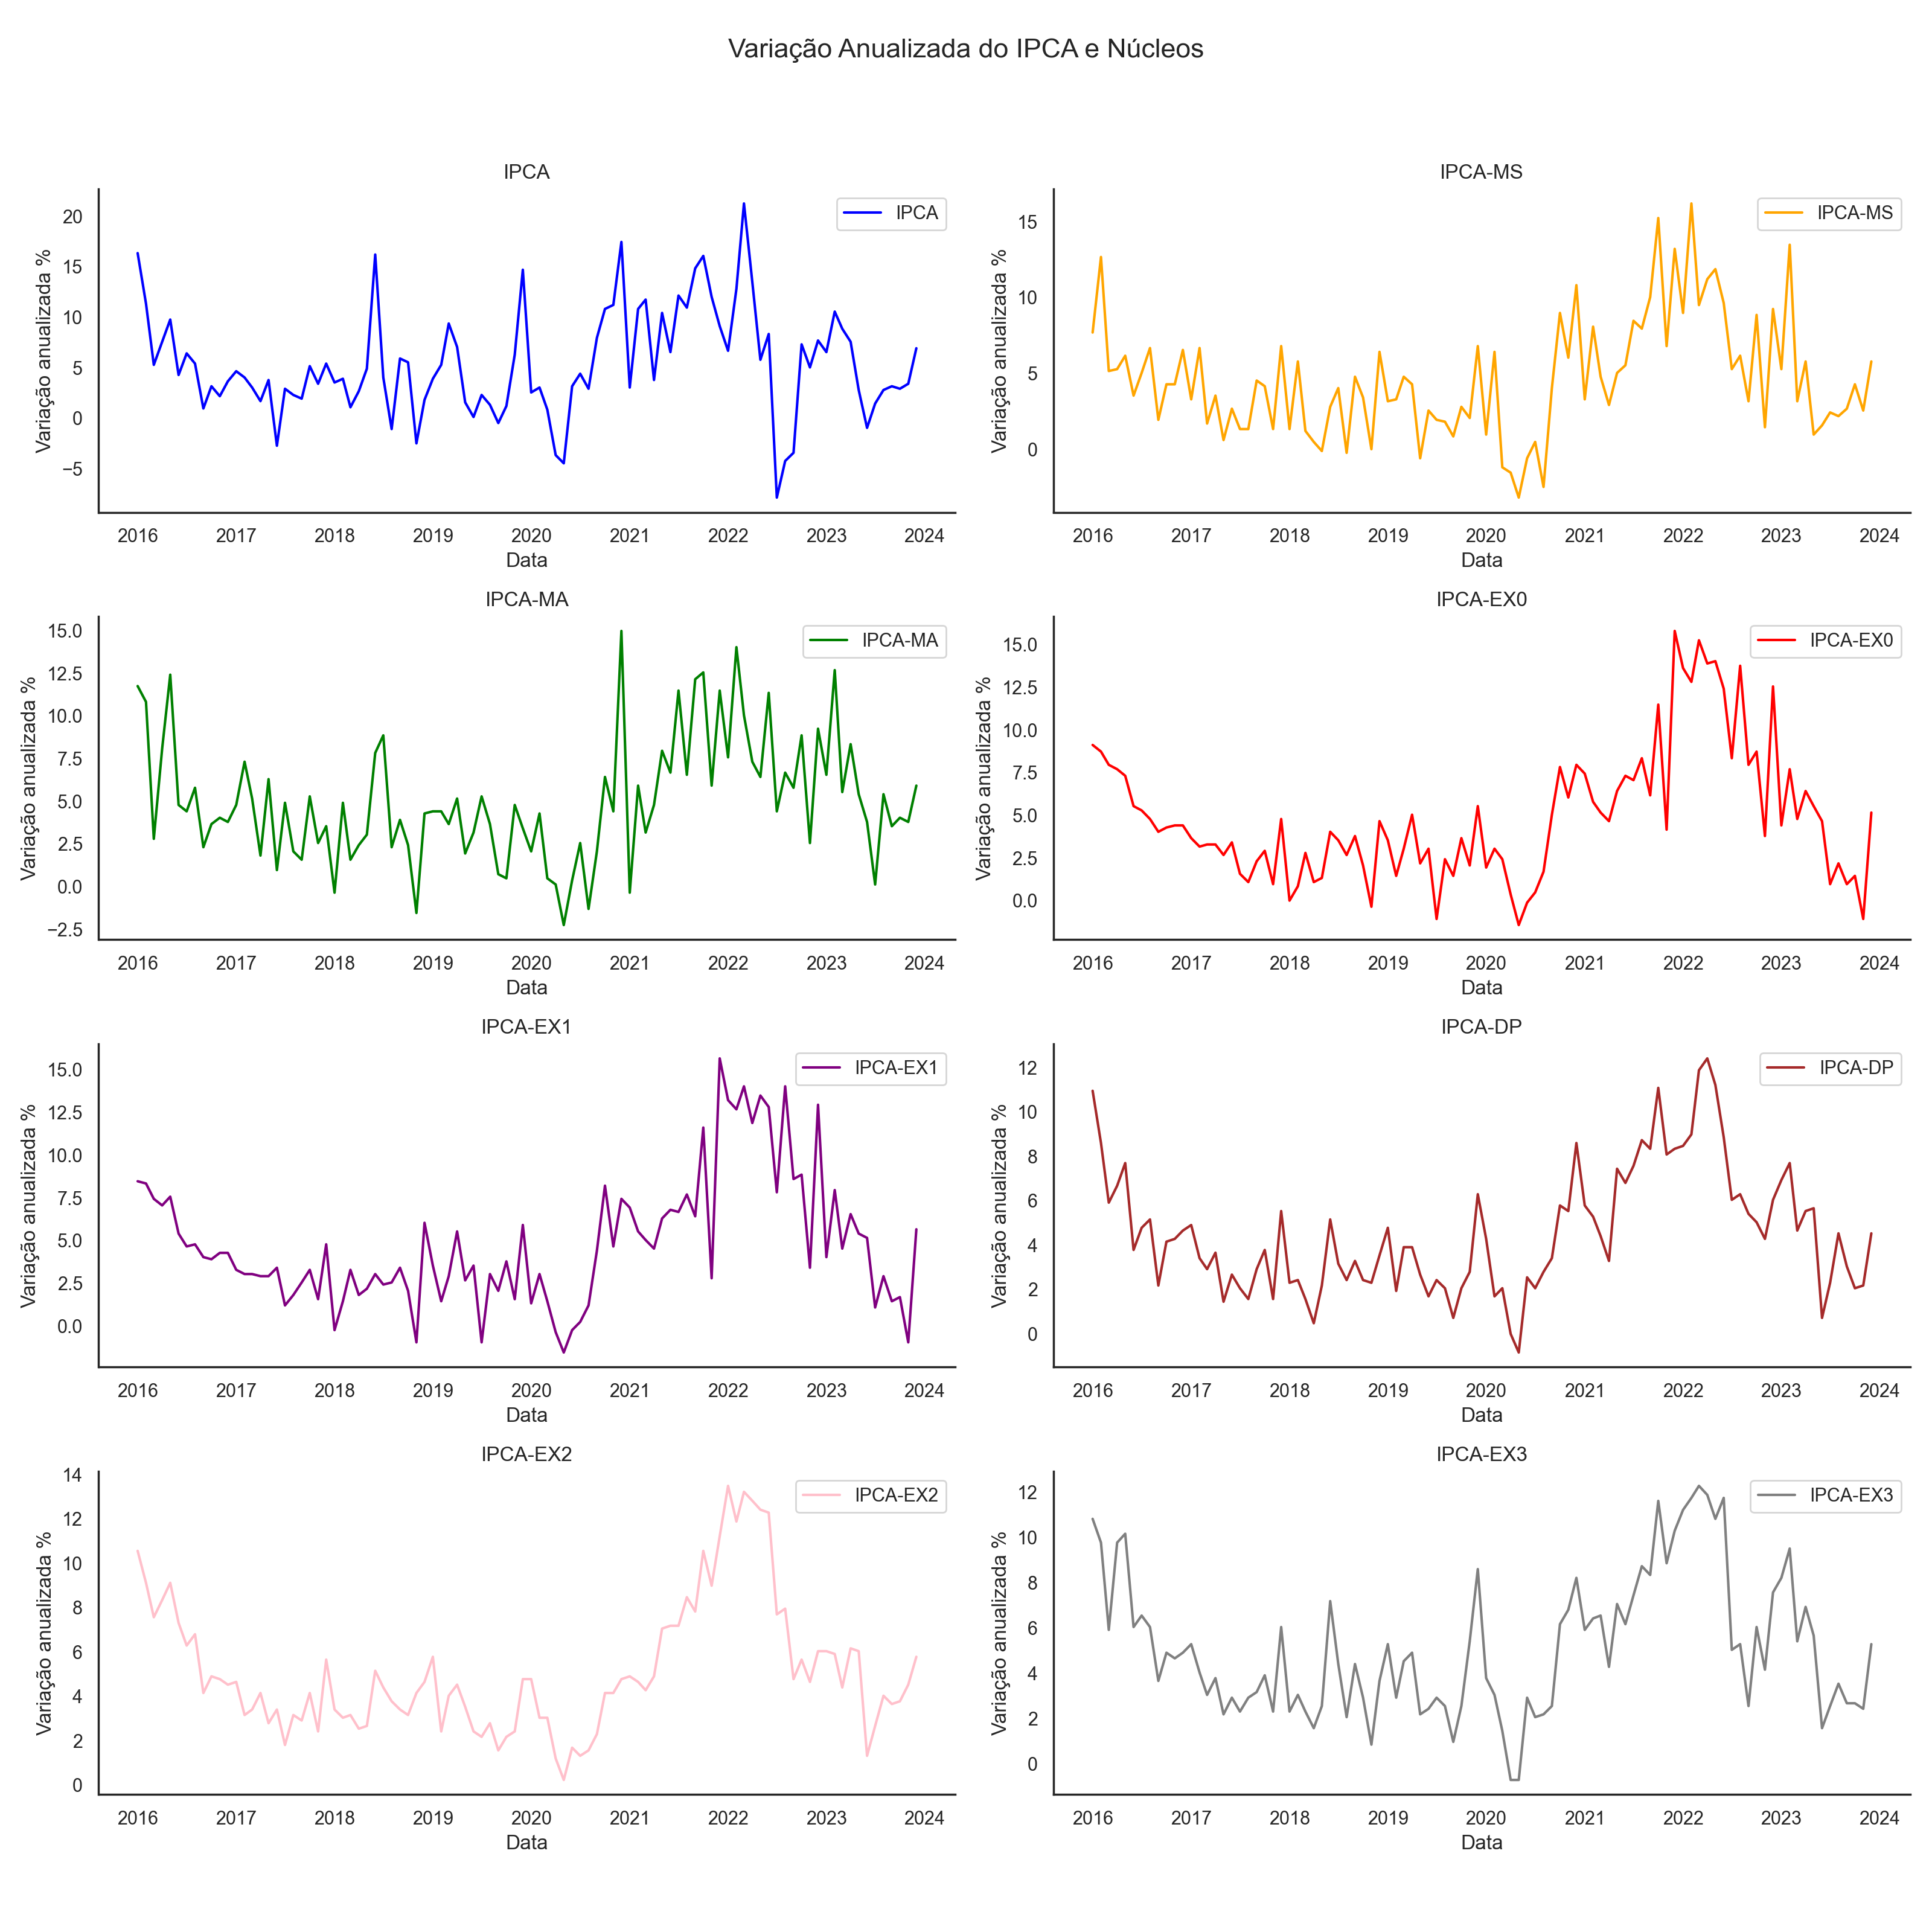

In [99]:
# Obtendo os dados
series = [
    codigo_bc(433),  # IPCA
    codigo_bc(11427),  # IPCA-MS
    codigo_bc(16121),  # IPCA-MA
    codigo_bc(27838),  # IPCA-EX0
    codigo_bc(27839),  # IPCA-EX1
    codigo_bc(11426),  # IPCA-DP
    codigo_bc(4466),   # IPCA-EX2
    codigo_bc(16122)   # IPCA-EX3
]

data_inicio = pd.to_datetime('2016-01-01')

# Ajustando as datas e calculando a variação anualizada
series_d = [ipca_anualizado(data_ajustada(data_inicio, serie)) for serie in series]

# Criando subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))
fig.suptitle('Variação Anualizada do IPCA e Núcleos', fontsize=16)

# Cores para cada série
cores = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Gerando os subplots
for ax, nome, serie, cor in zip(axs.flatten(), ["IPCA", "IPCA-MS", "IPCA-MA", "IPCA-EX0", "IPCA-EX1", "IPCA-DP", "IPCA-EX2", "IPCA-EX3"], series_d, cores):
    grafico_subplot(ax, nome, serie, cor)

# Ajustando o layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Exibindo o gráfico
plt.show()

Sim, eu sei que ficou confuso para você, para mim, para eles. Então que tal colcarmos essa variação em um só plot?

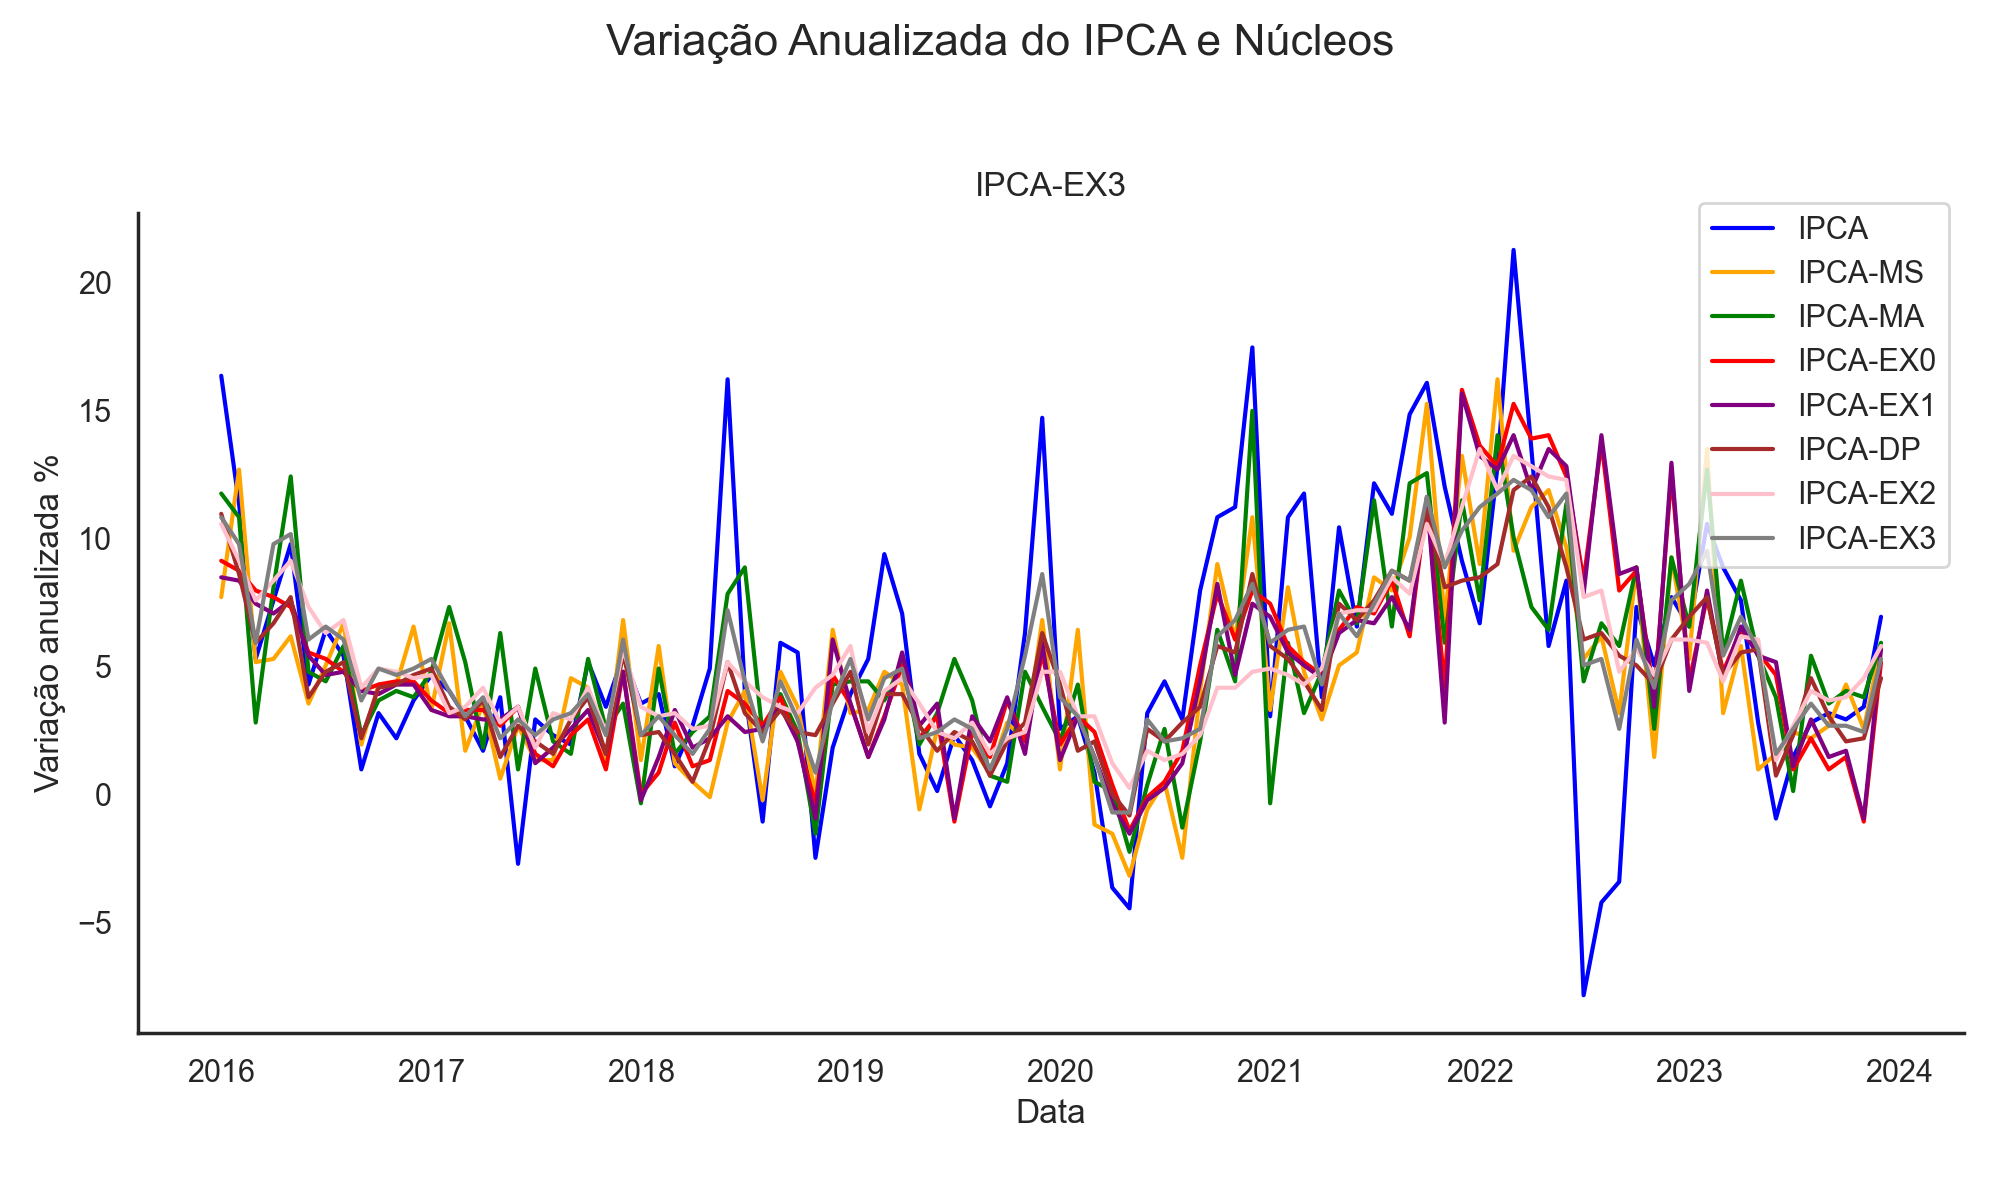

In [100]:
# Criando um único subplot
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Variação Anualizada do IPCA e Núcleos', fontsize=16)

# Gerando o único subplot
for nome, serie, cor in zip(["IPCA", "IPCA-MS", "IPCA-MA", "IPCA-EX0", "IPCA-EX1", "IPCA-DP", "IPCA-EX2", "IPCA-EX3"], series_d, cores):
    grafico_subplot(ax, nome, serie, cor)

# Movendo a legenda para o canto superior direito e ajustando a posição vertical
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.03))

# Ajustando o layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Exibindo o gráfico
plt.show()


### 5.2 Conclusão

Nota-se que os núcleos tendem a se comportar de maneira parecida, mas é importante perceber que já sim variações entre os mesmos, como o próprio IPCA que tem maior volatilidade.

-----

## FIM

## Agradecimentos e Próximos estudos

Finalizamos esse estudo com análise de fatores "externos" influenciam o grau inflacionário, como expectativas e até mesmo o El Niño.

Existem inúmeras outras análises inflacionárias que eu desejaria trazer a vocês, como Inflação Implícita, Convergência de expectativas e outros modelos como o SARIMA para previsibilidade, mas infelizmente esse estudo já ficou extenso demais.

Espero que esse seja relevante para você de alguma forma, pois o meu objetivo principal é treinar aprendizados e nada melhor que isso, ensinando.

**Próximos estudos:**

Além disso, aguardem que os próximos estudos serão:
1. Dívida pública brasileira
2. Saúde econômica americana
3. Mitos sobre a Crise 1929
4. Estudo sobre preços de combustíveis
5. e....vou pensar!

**Leituras recomendadas:**

1. [Macroeconomia Capa - Olivier Blanchard](https://amzn.to/3Tbf93K)
2. [Microeconomia - Hal Varian](https://amzn.to/46MRUjL)
3. [A Moeda e a Lei - Gustavo Franco](https://amzn.to/47J8FxC)
4. [Por que o Brasil Cresce Pouco? - Marcos Mendes](https://amzn.to/46JqlHX)
5. [Finanças públicas - Felipe Salto e Mansueto](https://amzn.to/3Rv5pzY)
6. [Quantitative Trading Strategies Using Python - Peng Liu](https://amzn.to/4a5WH2z)
